<a href="https://colab.research.google.com/github/NikitaMarnykh/airflow_ractice_report/blob/main/%D0%9C%D0%B0%D1%80%D0%BD%D1%8B%D1%85_%D0%9D_%D0%92_%D0%B8_%D0%9E%D0%B1%D0%BE%D1%80%D0%BE%D1%82%D0%BE%D0%B2_%D0%9C_%D0%92_%D1%80%D1%8B%D0%BD%D0%BE%D0%BA_%D1%82%D1%80%D1%83%D0%B4%D0%B0_%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D0%B2%D0%B7%D0%B0%D0%B8%D0%BC%D0%BE%D1%81%D0%B2%D1%8F%D0%B7%D0%B8_%D0%B4%D0%B2%D1%83%D1%85_%D0%BA%D0%B0%D1%82%D0%B5%D0%B3%D0%BE%D1%80%D0%B8%D0%B0%D0%BB%D1%8C%D0%BD%D1%8B%D1%85_%D0%BF%D1%80%D0%B8%D0%B7%D0%BD%D0%B0%D0%BA%D0%BE%D0%B2_%D1%87%D0%B0%D1%81%D1%82%D1%8C_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Признаки, которые будут использованы для дальнейшего анализа**

Категориальные признаки:

  - ключевые навыки (key_skills)

  - опыт работы (experience)

  - график работы (schedule)

  - тип занятости (employment)

  - доступна ли вакансия для соискателей с инвалидностью (accept_handicapped)

  - город (city)

  - сфера деятельности (field_of_activity)

## 15. Установка и подключение зависимостей для анализа взаимосвязей категориальных признаков

Устанавливаем все необходимые зависимости

In [315]:
!pip install numpy
!pip install matplotlib
!pip install pandas

Подключаем все необходимые зависимости

In [316]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

Подгружаем репозиторий для работы с ним

In [317]:
!git clone https://github.com/NikitaMarnykh/labor_market_analysis

Cloning into 'labor_market_analysis'...
remote: Enumerating objects: 94, done.
remote: Counting objects: 100% (94/94), done.
remote: Compressing objects: 100% (91/91), done.
remote: Total 94 (delta 53), reused 9 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (94/94), 61.13 MiB | 8.17 MiB/s, done.
Resolving deltas: 100% (53/53), done.
Updating files: 100% (11/11), done.


Перейдём в установленный репозиторий

In [318]:
%cd labor_market_analysis/

/content/labor_market_analysis/labor_market_analysis/labor_market_analysis/labor_market_analysis


Сохраним датасет в переменную

In [319]:
dataset = pd.read_csv('cleaned_hh_hard.csv',
                      na_values=['NA', 'N/A', 'null', 'missing', '-', '?', '...'],
                      dtype={
                             'id': 'Int64', 'professional_roles': 'string',
                             'experience': 'category', 'schedule': 'category',
                             'employment': 'category', 'employer': 'string',
                             'accept_handicapped': 'category', 'key_skills': 'string',
                             'city': 'string', 'salary_from': 'Int64',
                             'salary_to': 'Int64', 'field_of_activity': 'category',

                      },
                      keep_default_na=True,
                      na_filter=True)

Посмотрим информацию о датасете

In [320]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81412 entries, 0 to 81411
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   id                  81412 non-null  Int64   
 1   professional_roles  81412 non-null  string  
 2   experience          81412 non-null  category
 3   schedule            81412 non-null  category
 4   employment          81412 non-null  category
 5   employer            81412 non-null  string  
 6   accept_handicapped  81412 non-null  category
 7   key_skills          81412 non-null  string  
 8   city                81412 non-null  string  
 9   salary_from         81412 non-null  Int64   
 10  salary_to           81412 non-null  Int64   
 11  field_of_activity   81412 non-null  category
dtypes: Int64(3), category(5), string(4)
memory usage: 5.0 MB


## 16. Анализ взаимосвязи двух категориальных признаков (Часть 3)

Зададим базовые цвета для отображения топ 5 категорий для анализа признаков

In [321]:
colors = ('#FF9AA2', '#FFB7B2', '#FFDAC1', '#E2F0CB', '#B5EAD7')

Зададим свойства секторов (долей) круговой диаграммы

In [322]:
wedgeprops = {'linewidth': 1.5, 'edgecolor': 'white'}

Зададим свойства текста круговой диаграммы

In [323]:
textprops={'fontsize': 12}

### 16.1 Сфера для анализа ключевых навыков "Торговля и продажи"

Сохраним сферу для анализа в переменную field

In [324]:
field = "Торговля и продажи"

Сохраним признаки для анализа в переменную columns

In [325]:
columns = ('key_skills', 'field_of_activity', 'city', 'experience', 'schedule', 'employment', 'accept_handicapped')

Посмотрим на уникальные навыки в данной сфере

In [326]:
unique_skills = dataset.groupby(columns[1])[columns[0]].get_group(field).unique()
unique_skills

/tmp/ipython-input-326-1462447233.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  unique_skills = dataset.groupby(columns[1])[columns[0]].get_group(field).unique()


<StringArray>
[                                'Грамотная речь',
                              'Базовые знания ПК',
                                        'Продажи',
                    'Коммуникативная грамотность',
                          'Составление договоров',
                         'Организаторские навыки',
             'Поиск и привлечение новых клиентов',
 'Публичные выступления и проведение презентаций',
                               'Работа в команде',
               'Управление и планирование продаж',
 ...
            'Знание и соблюдение санитарных норм',
           'Продажа банковских продуктов и услуг',
       'Навыки работы с каналами сбыта продукции',
                            'Технический перевод',
                                  'Pascal/Delphi',
                'Научно-исследовательская работа',
            'Техническая поддержка пользователей',
                                        'GameDev',
            'Предпродажная подготовка автомобиля',
            

Оценим количество уникальных скиллов в сфере

In [327]:
unique_skills.shape

(220,)

Проведём неграфический структурный анализ. Сохраним результаты работы метода отсортировав значения.

In [328]:
value_counts = dataset.groupby(columns[1])[columns[0]].get_group(field).value_counts().sort_values(ascending=False)
value_counts

/tmp/ipython-input-328-3551560173.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  value_counts = dataset.groupby(columns[1])[columns[0]].get_group(field).value_counts().sort_values(ascending=False)


,count
key_skills,
Продажи,1903
Коммуникативная грамотность,1489
Работа в команде,1300
Грамотная речь,1063
Базовые знания ПК,810
...,...
Научно-исследовательская работа,1
Техническая поддержка пользователей,1
GameDev,1


#### 16.1.1 На какие навыки и в каких городах наибольший спрос

Сгруппируем датасет по городам и сферам деятельности

In [329]:
grouped = dataset.groupby([columns[2], columns[1]], observed=False)[columns[0]]

Выберем и сохраним результаты по необходимой нам сфере

In [330]:
in_demand_skills_in_cities = pd.DataFrame()

for city in dataset[columns[2]].unique():

    try:
        group = grouped.get_group((city, field))
        skills_counts = group.value_counts()
        in_demand_skills_in_cities[city] = skills_counts

    except KeyError:
        continue

in_demand_skills_in_cities.fillna(0, inplace=True)
in_demand_skills_in_cities

,Томск,Первомайское (Томская область),Самусь,Колпашево,Кедровый,Кривошеино,Кисловка,Бакчар,Богашёво,Северск (Томская область),...,Тегульдет,Зональная Станция,Александровское (Томская область),Зоркальцево,Тогур,Парабель,Кожевниково,Зырянское,Нарга,Моряковский Затон
key_skills,,,,,,,,,,,,,,,,,,,,,
Продажи,1715,1,0,6,2,2,1,2,2,99,...,1,4,1,0,0,2,5,1,0,0
Коммуникативная грамотность,1383,2,0,8,2,2,0,1,0,47,...,0,2,0,0,0,6,1,2,0,0
Работа в команде,1131,2,0,2,2,3,2,2,0,84,...,1,3,1,0,0,6,6,4,0,0
Грамотная речь,987,3,0,1,0,1,1,0,0,40,...,0,1,0,0,0,1,1,3,0,0
Базовые знания ПК,721,2,0,1,2,0,2,1,0,45,...,0,1,0,1,0,0,1,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Научно-исследовательская работа,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Техническая поддержка пользователей,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GameDev,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Визуализируем графически результаты группировки

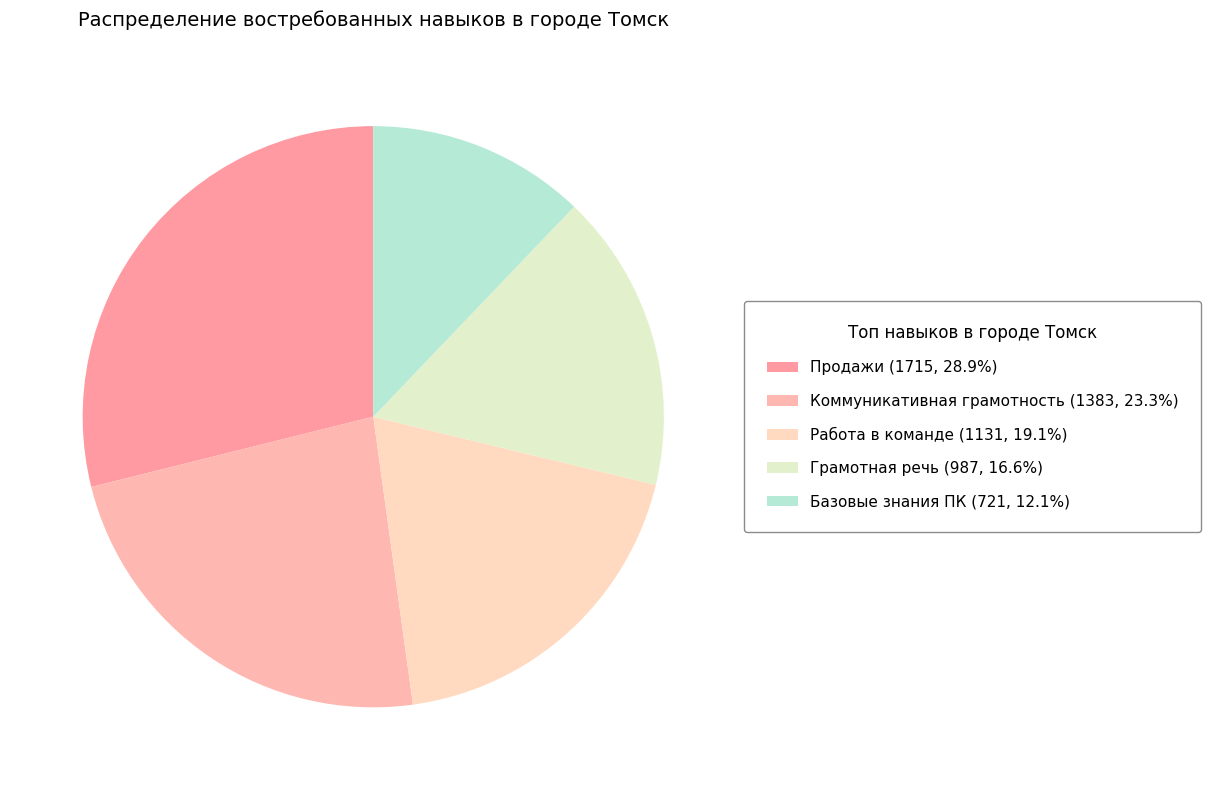

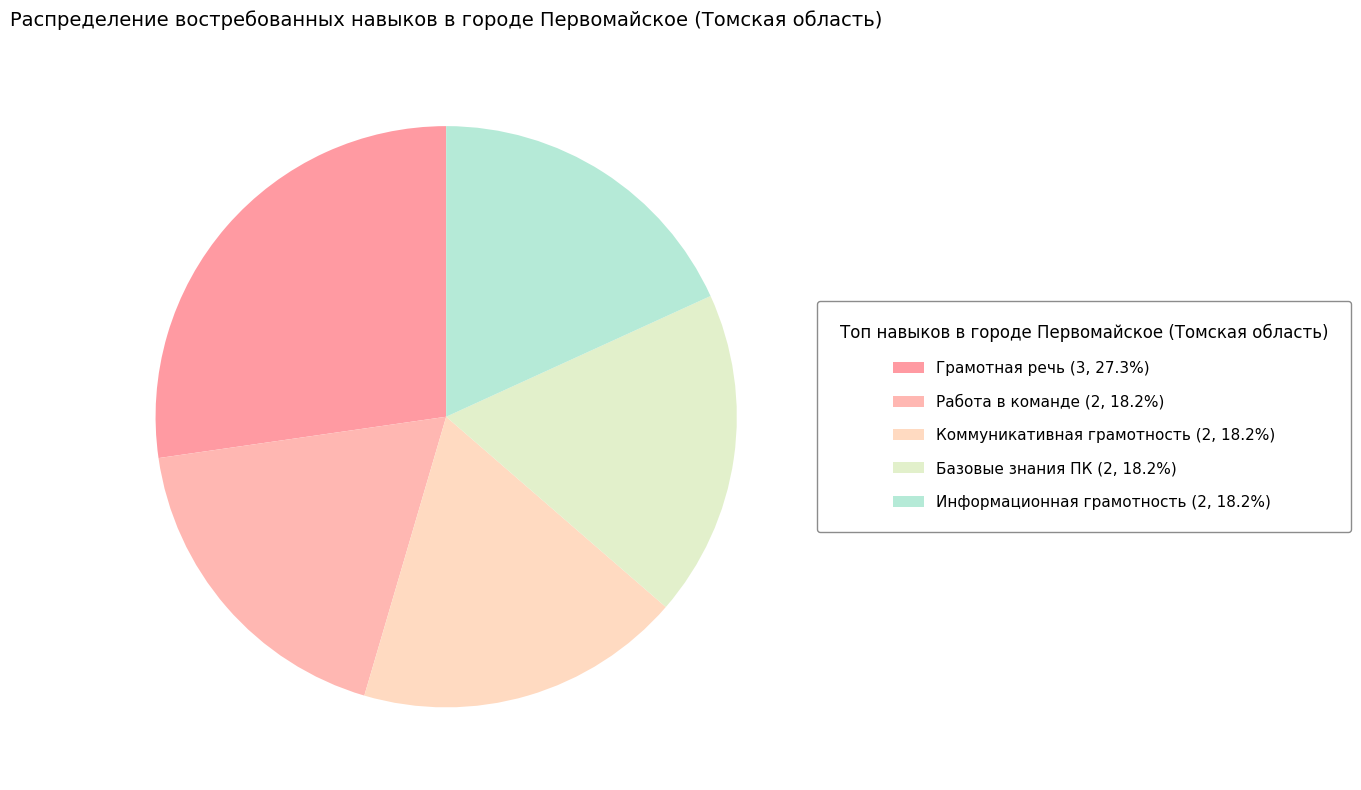

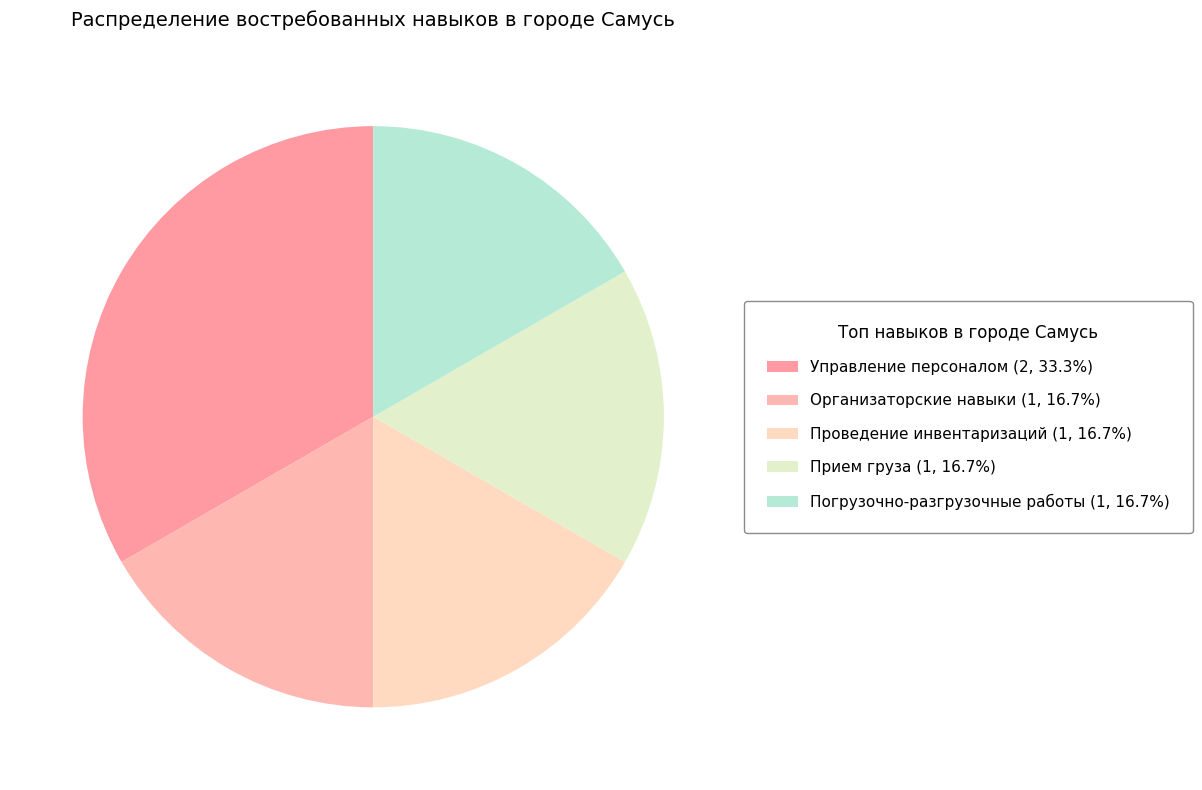

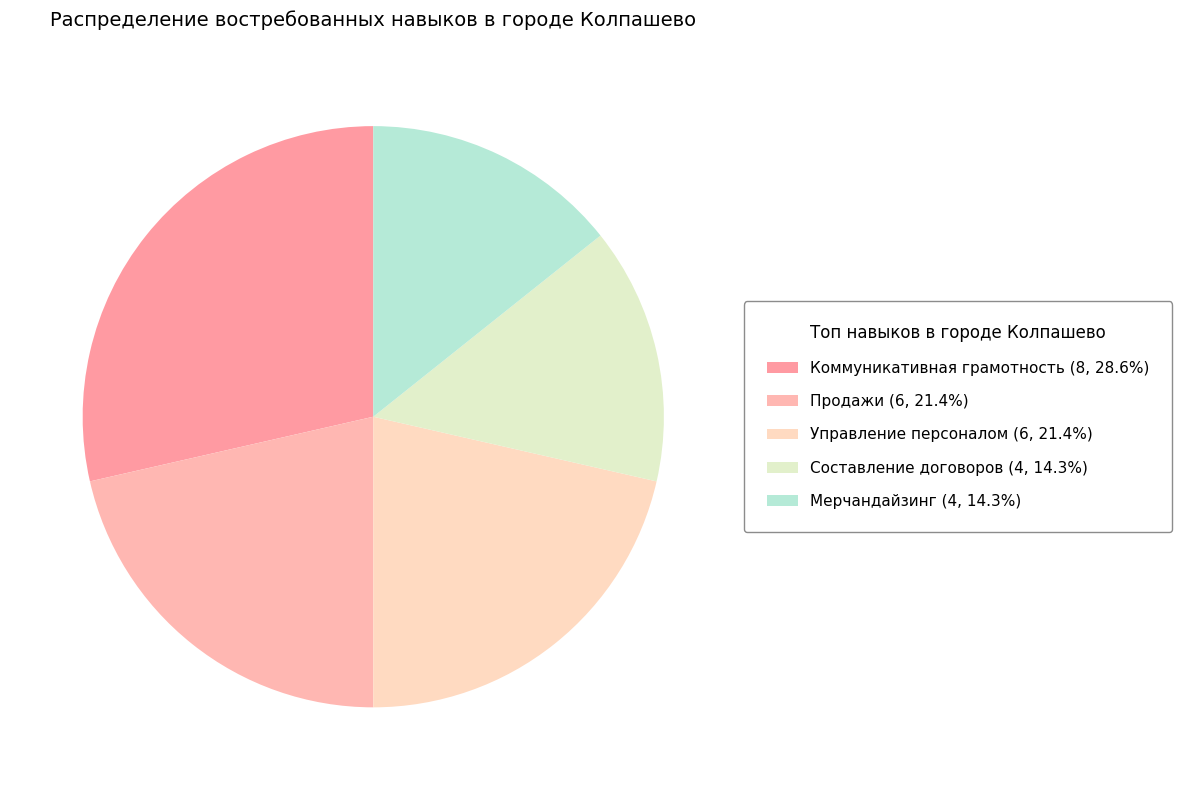

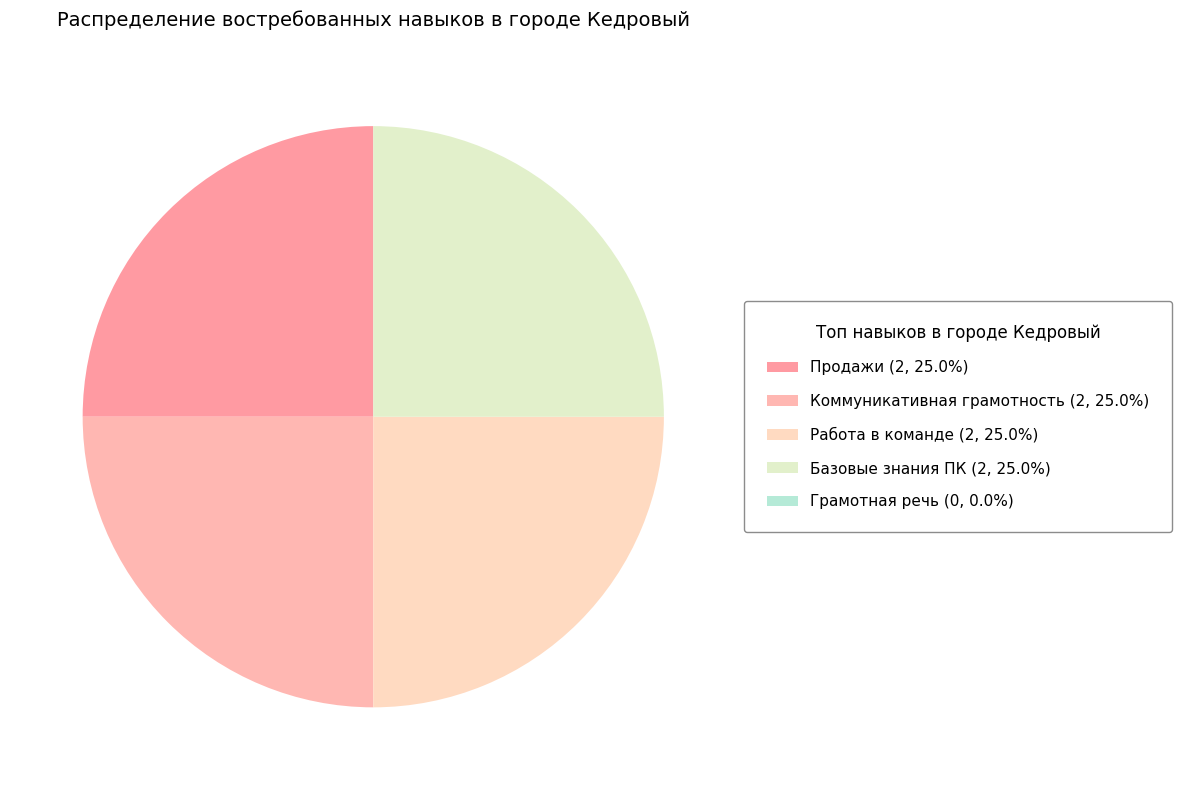

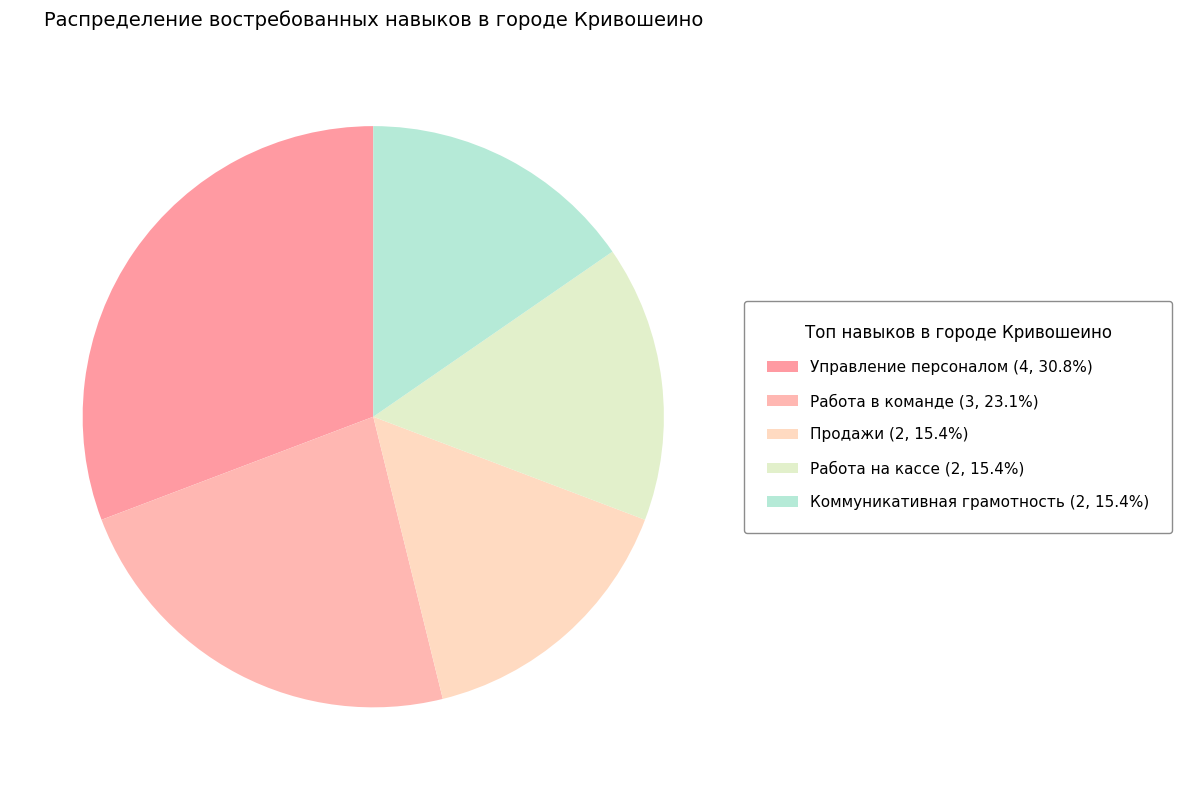

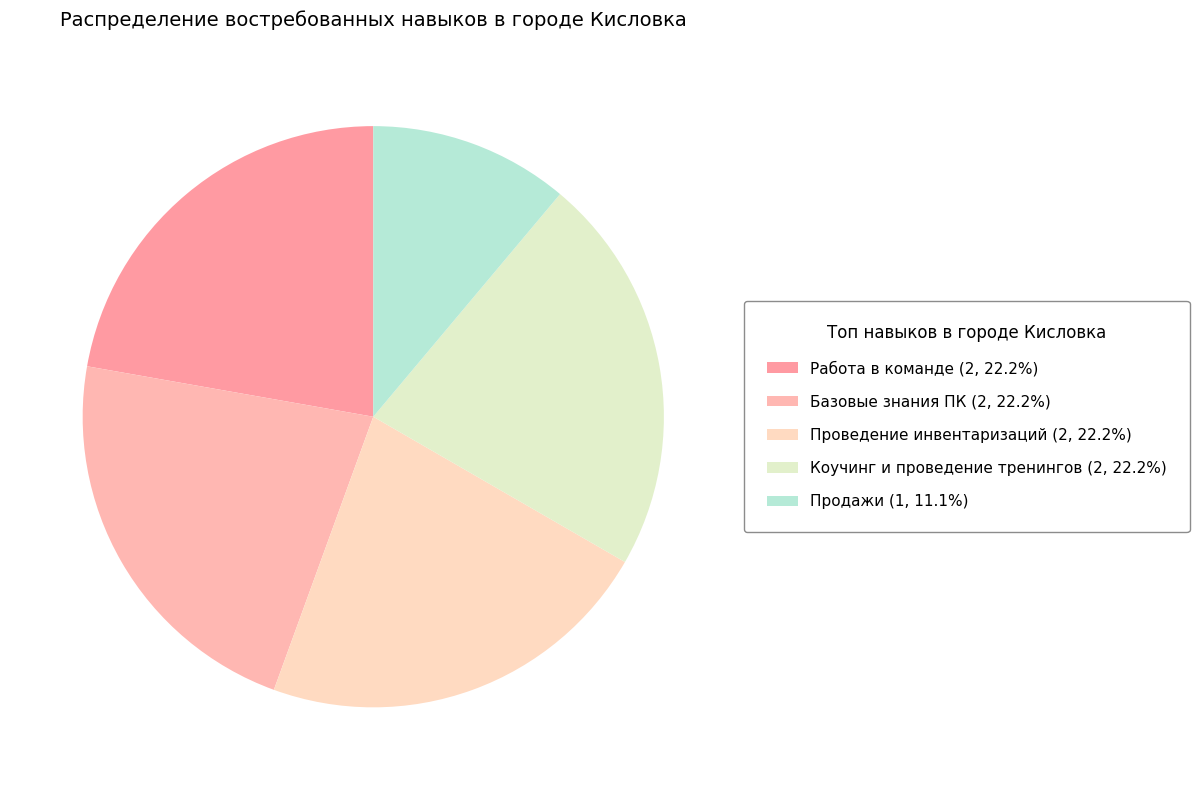

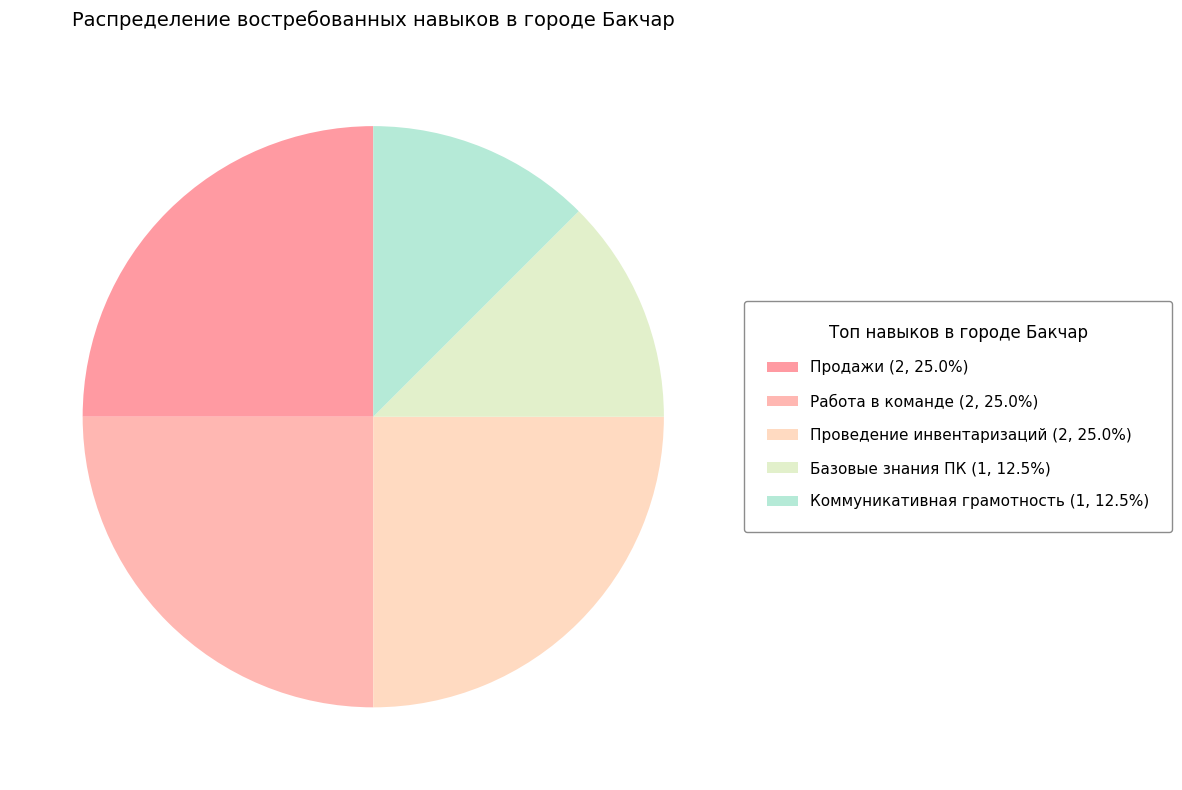

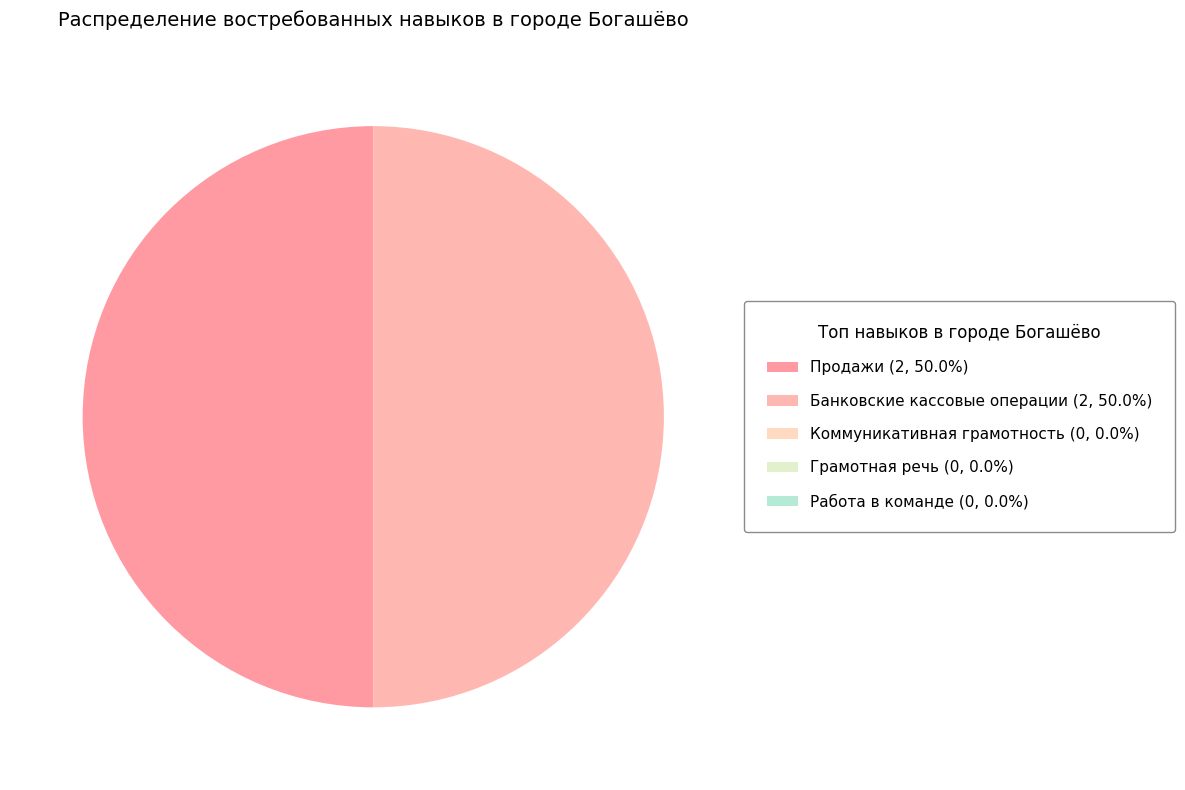

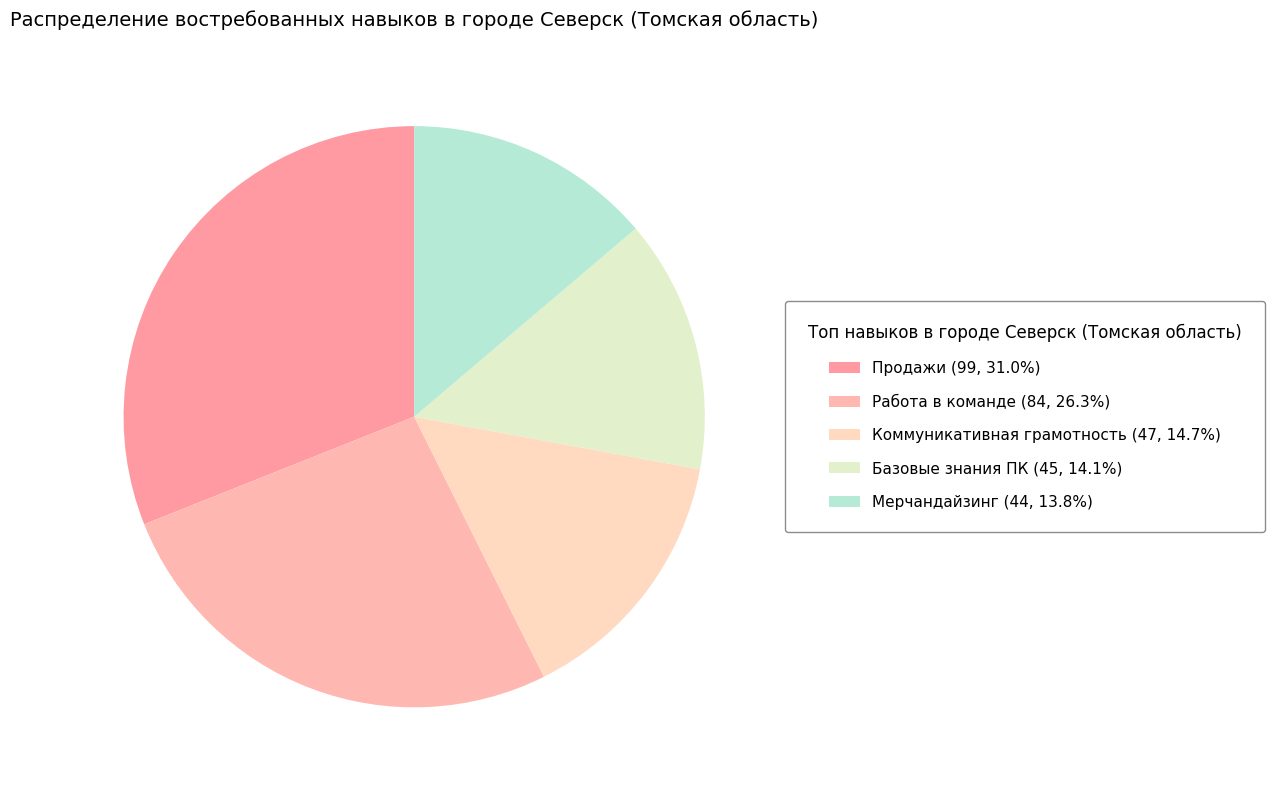

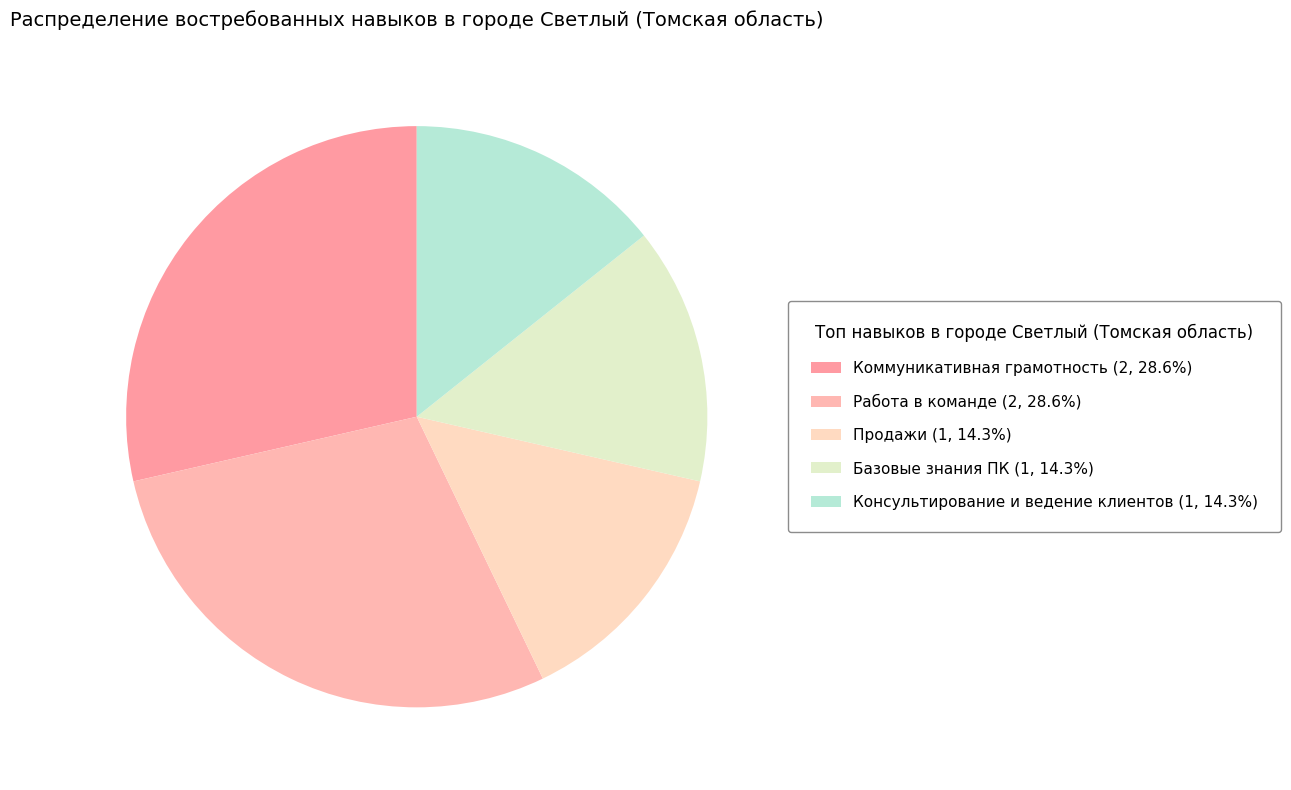

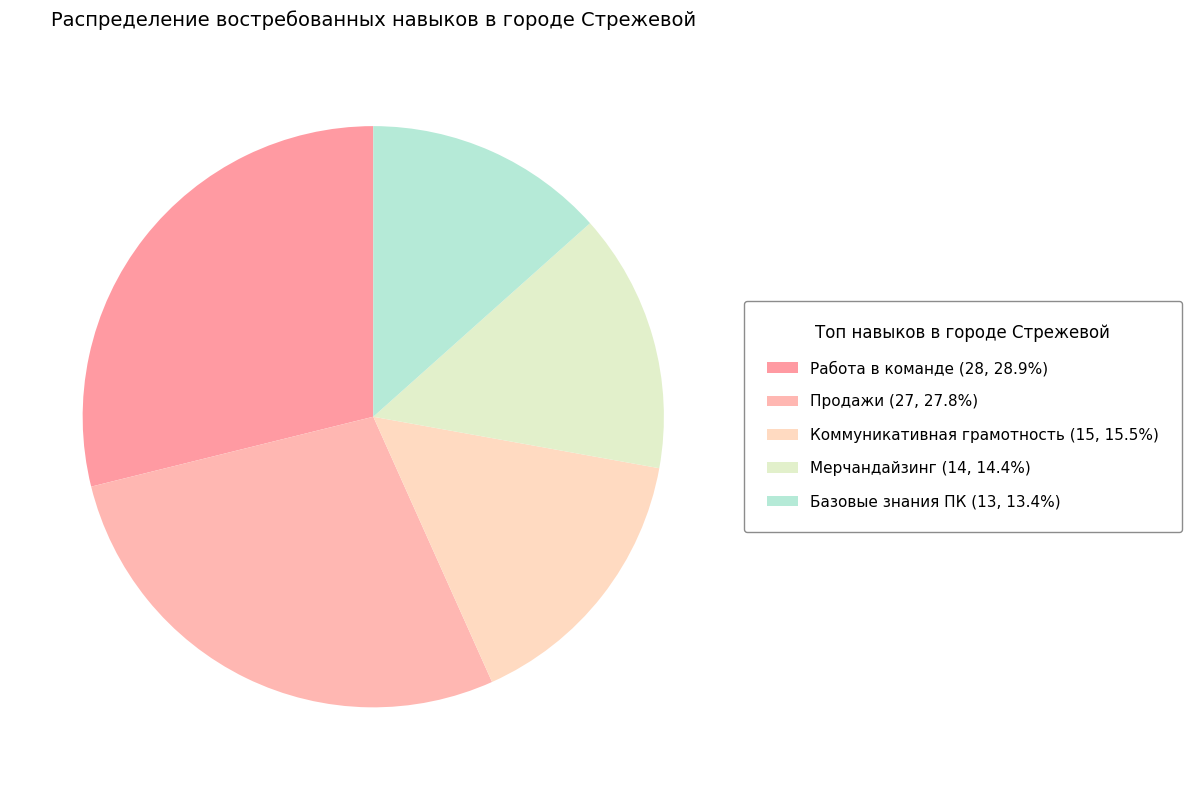

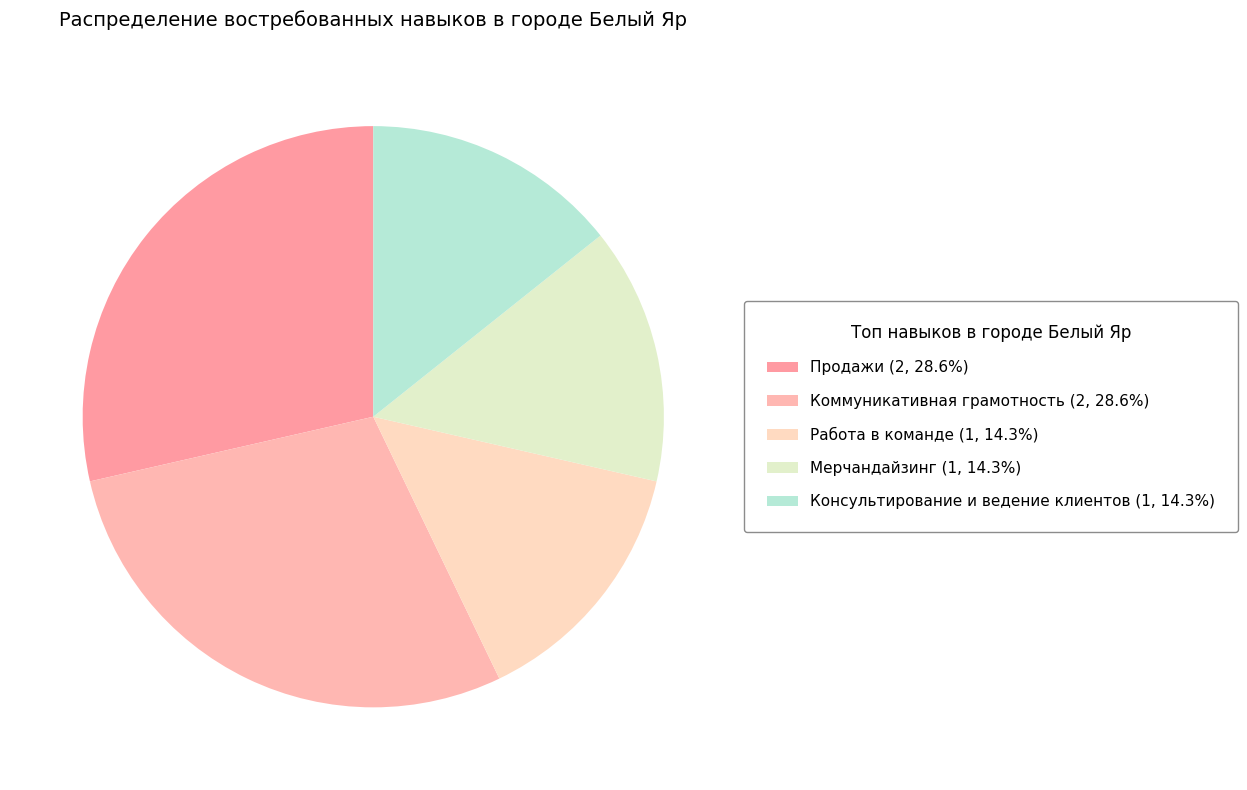

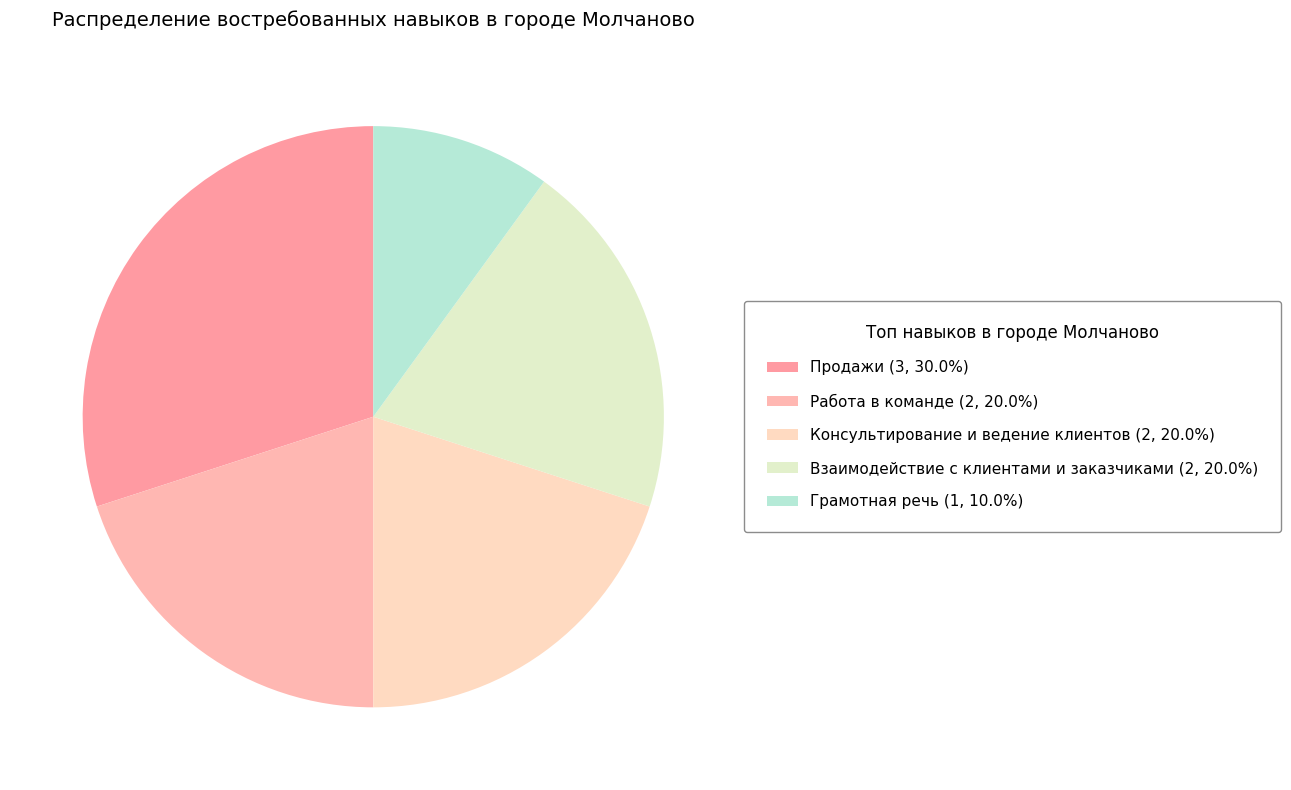

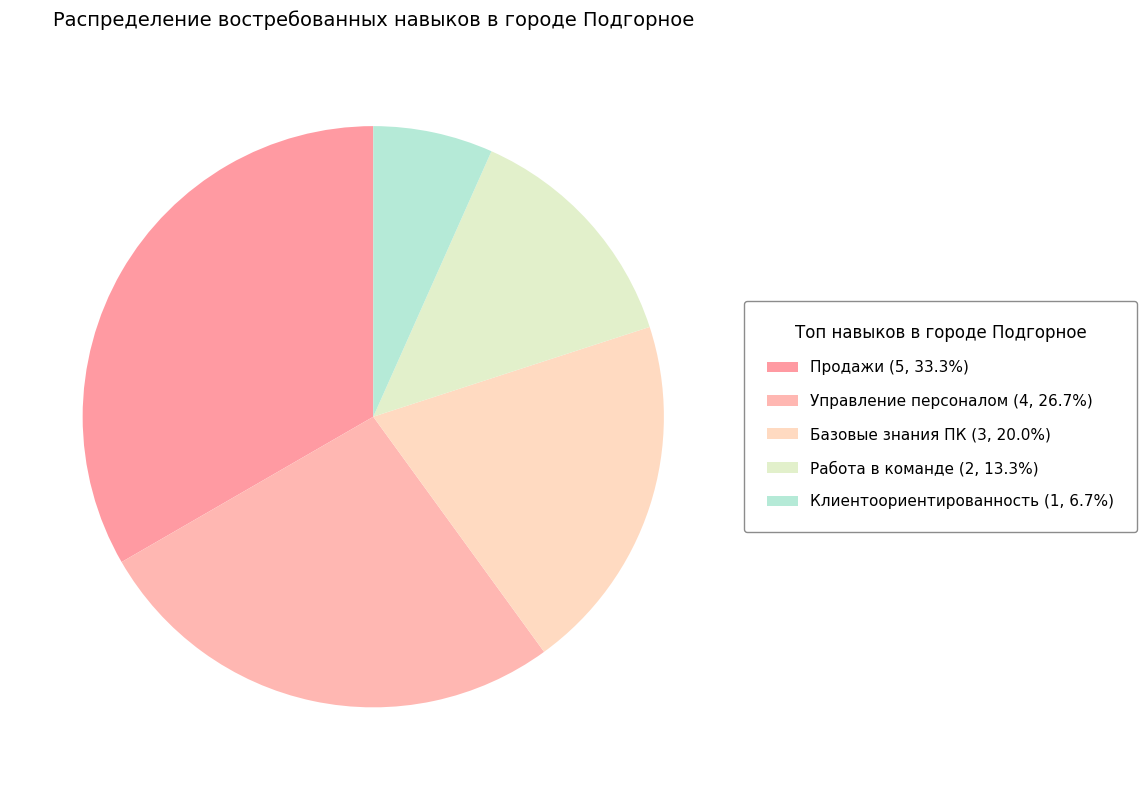

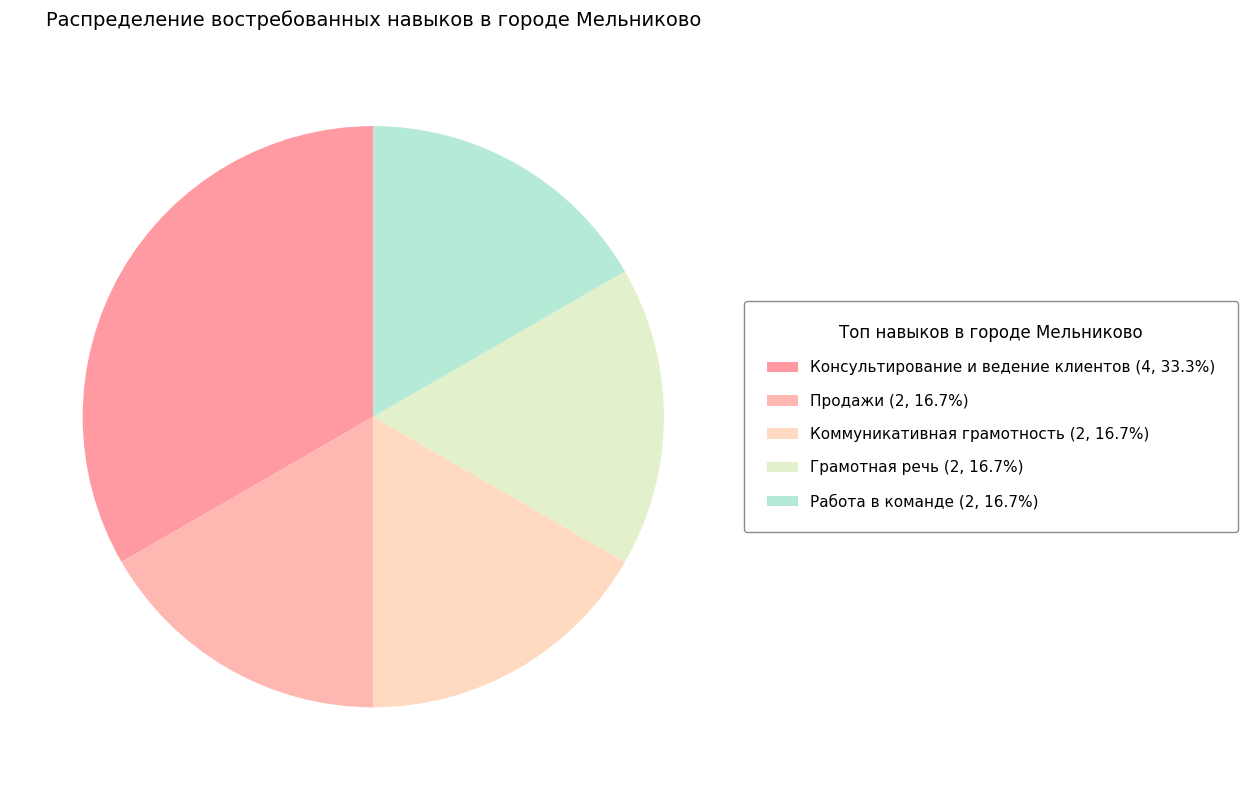

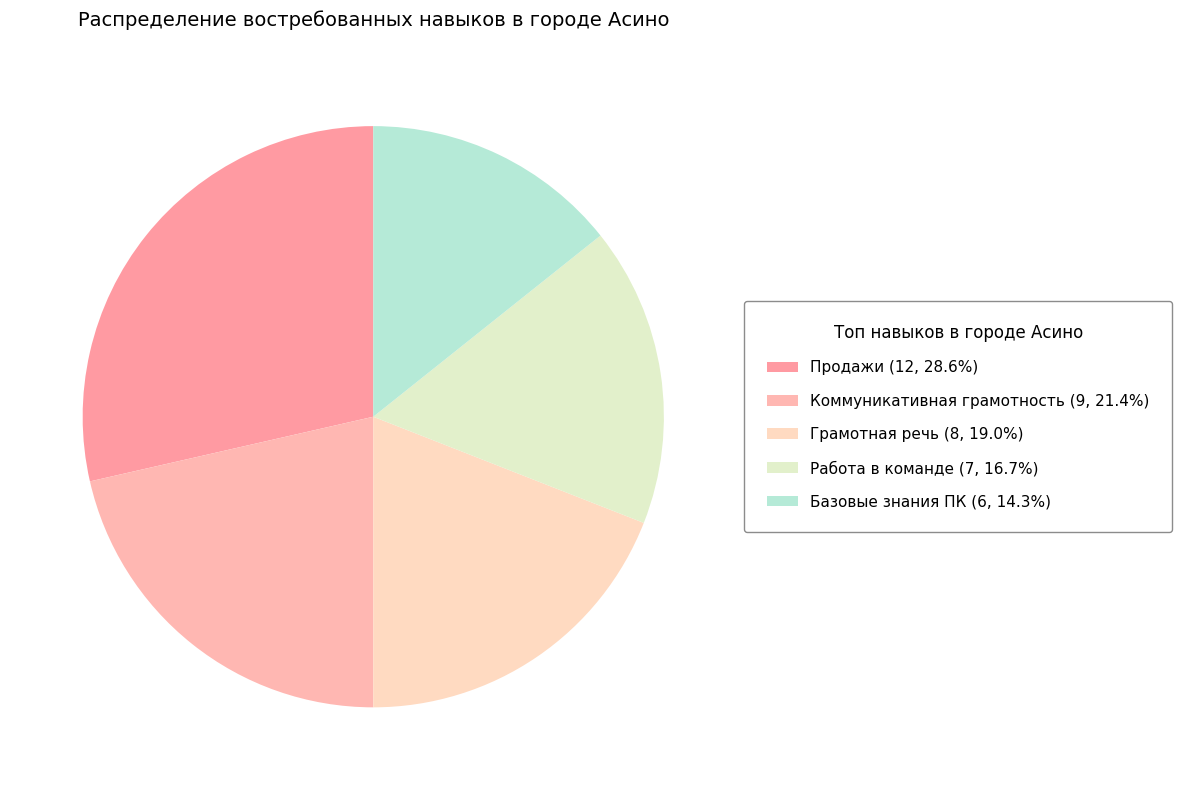

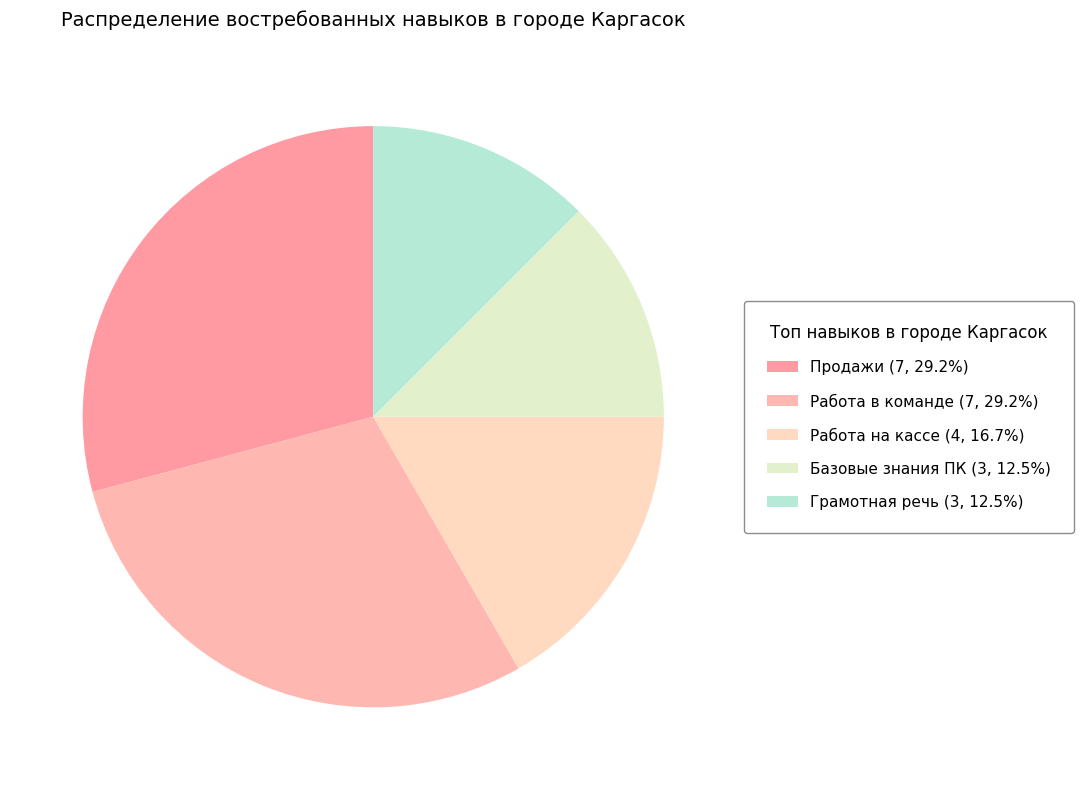

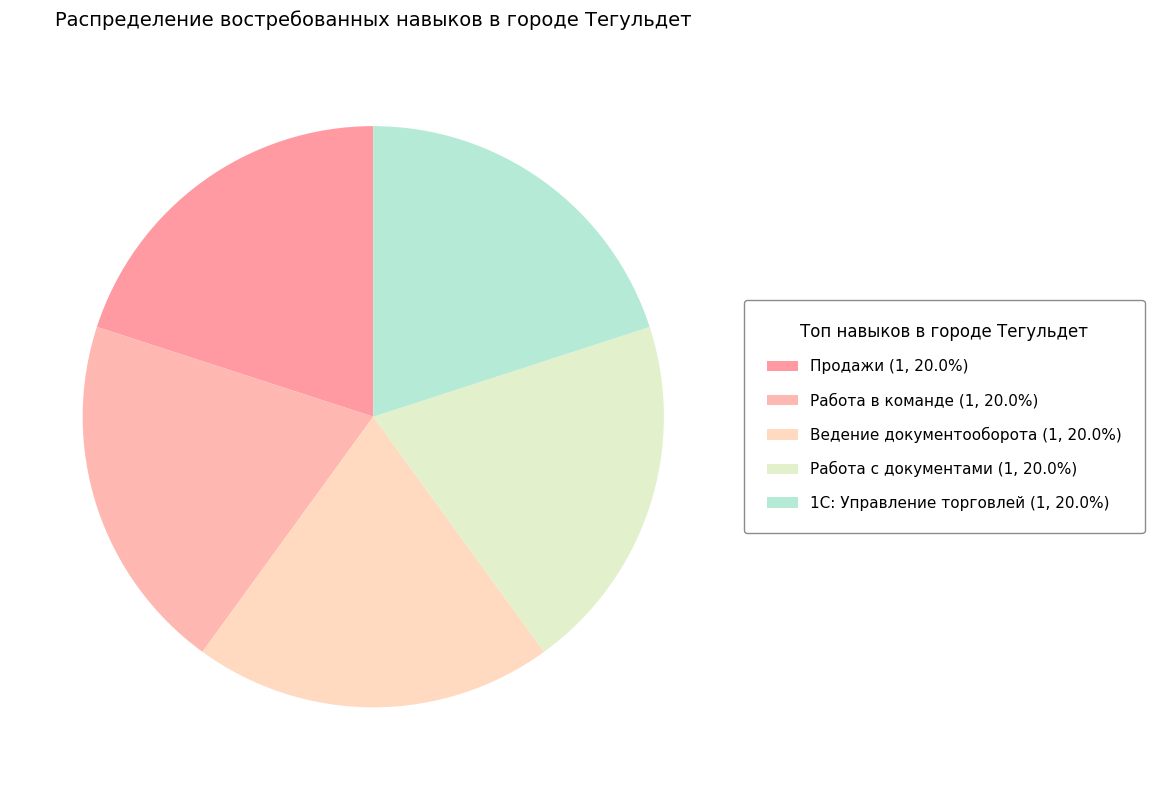

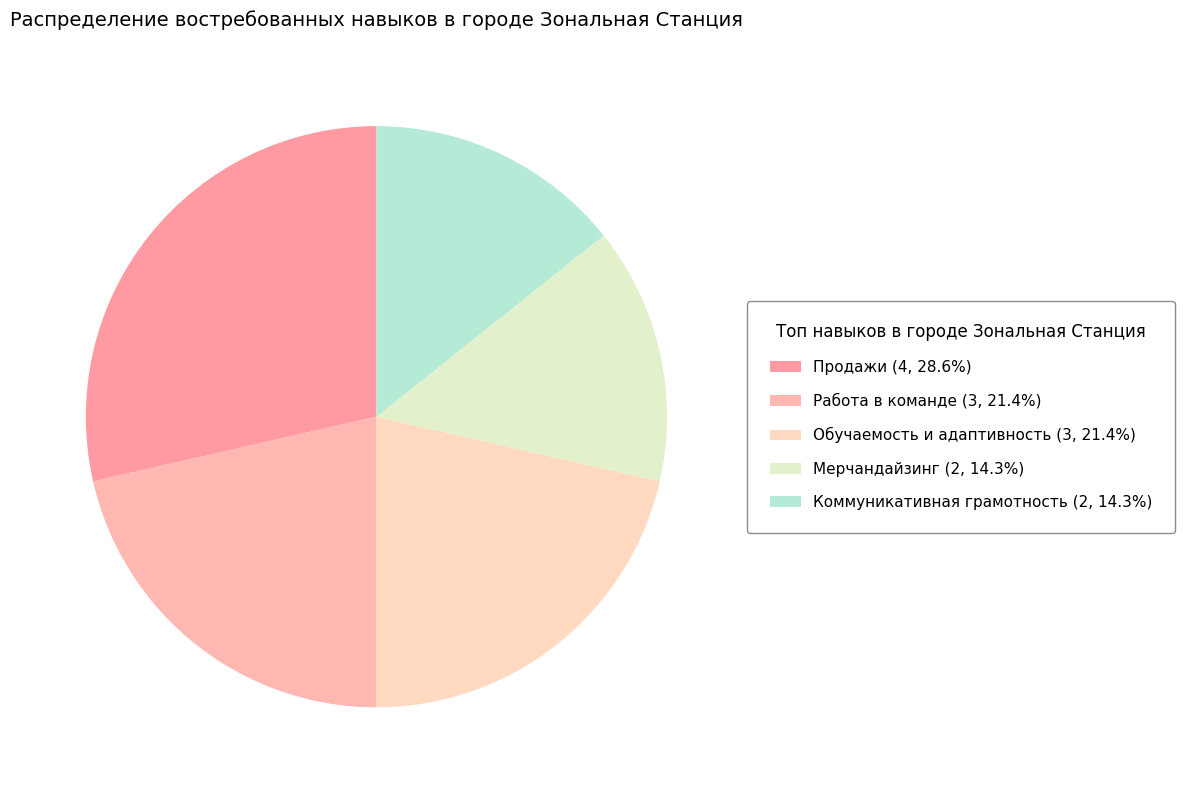

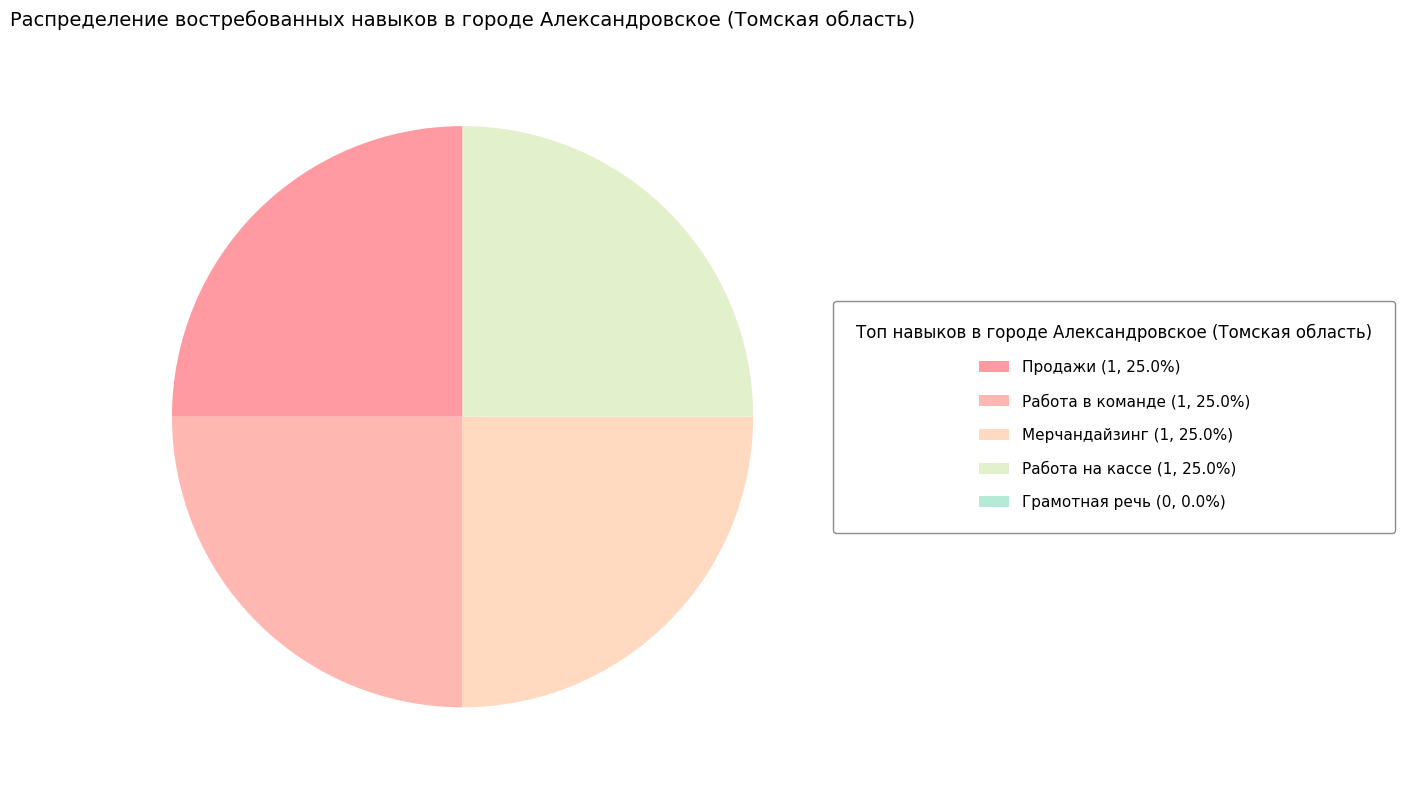

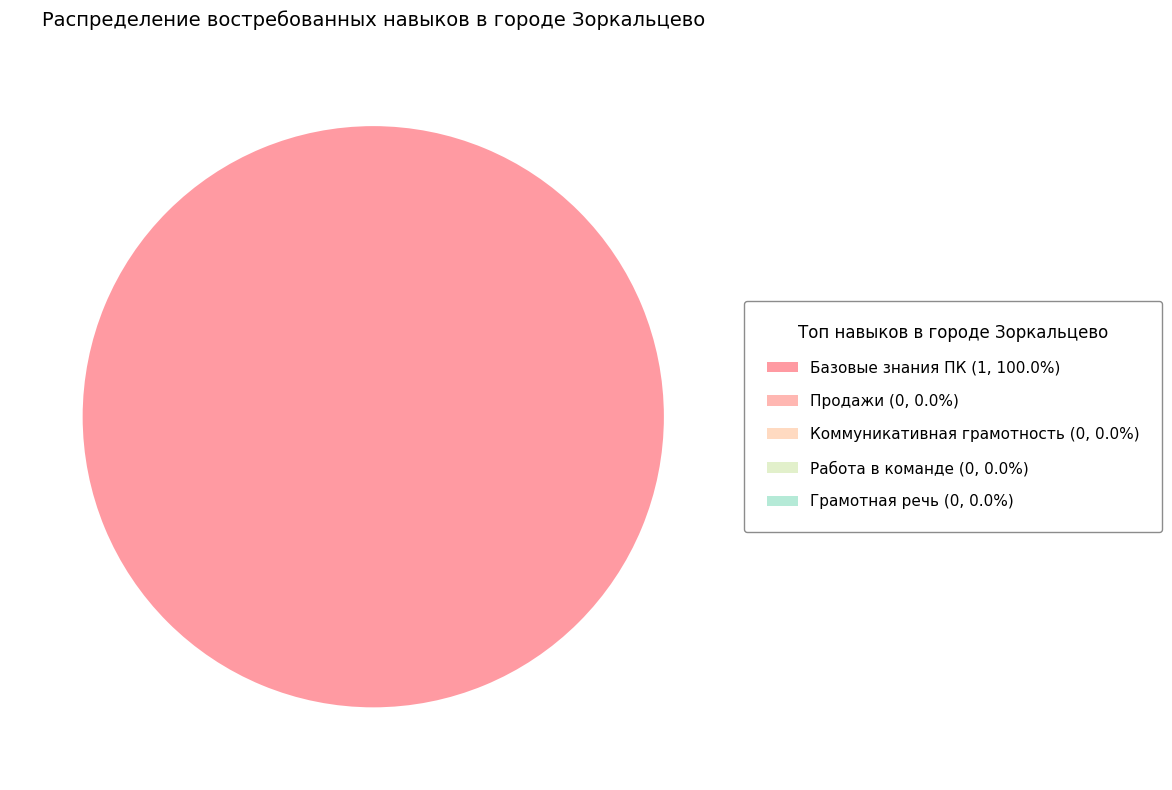

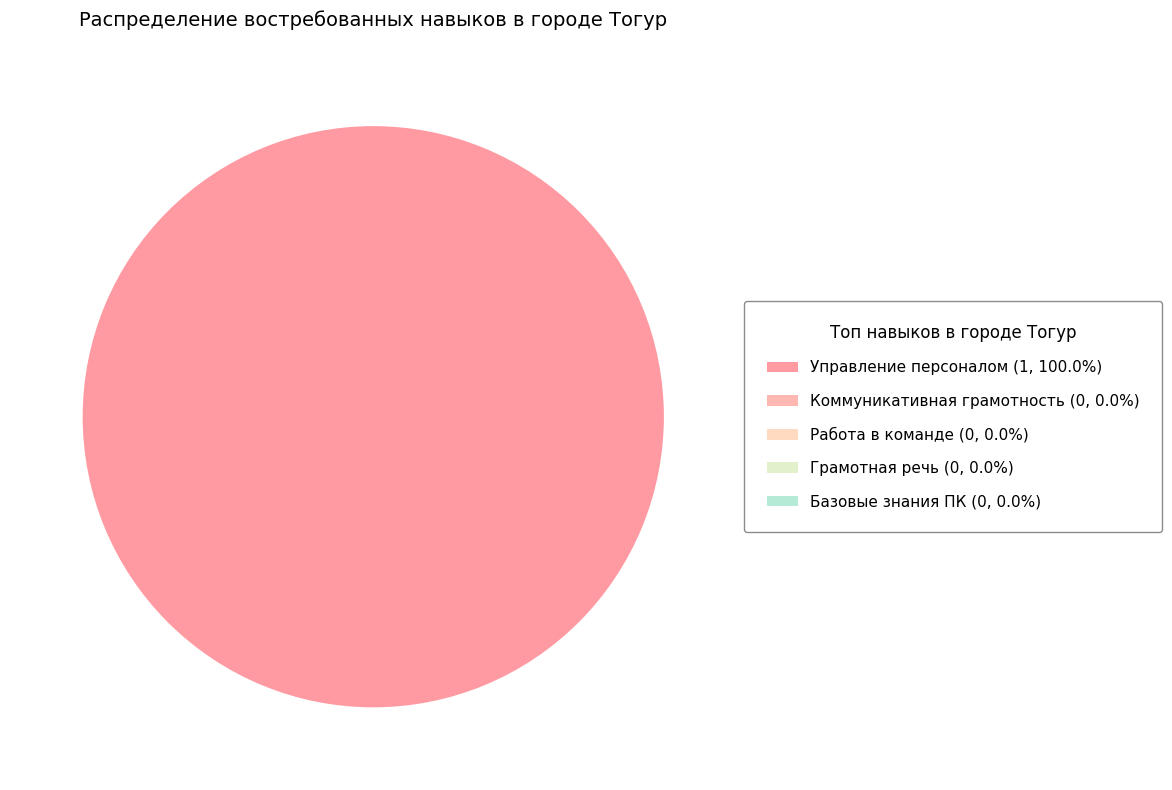

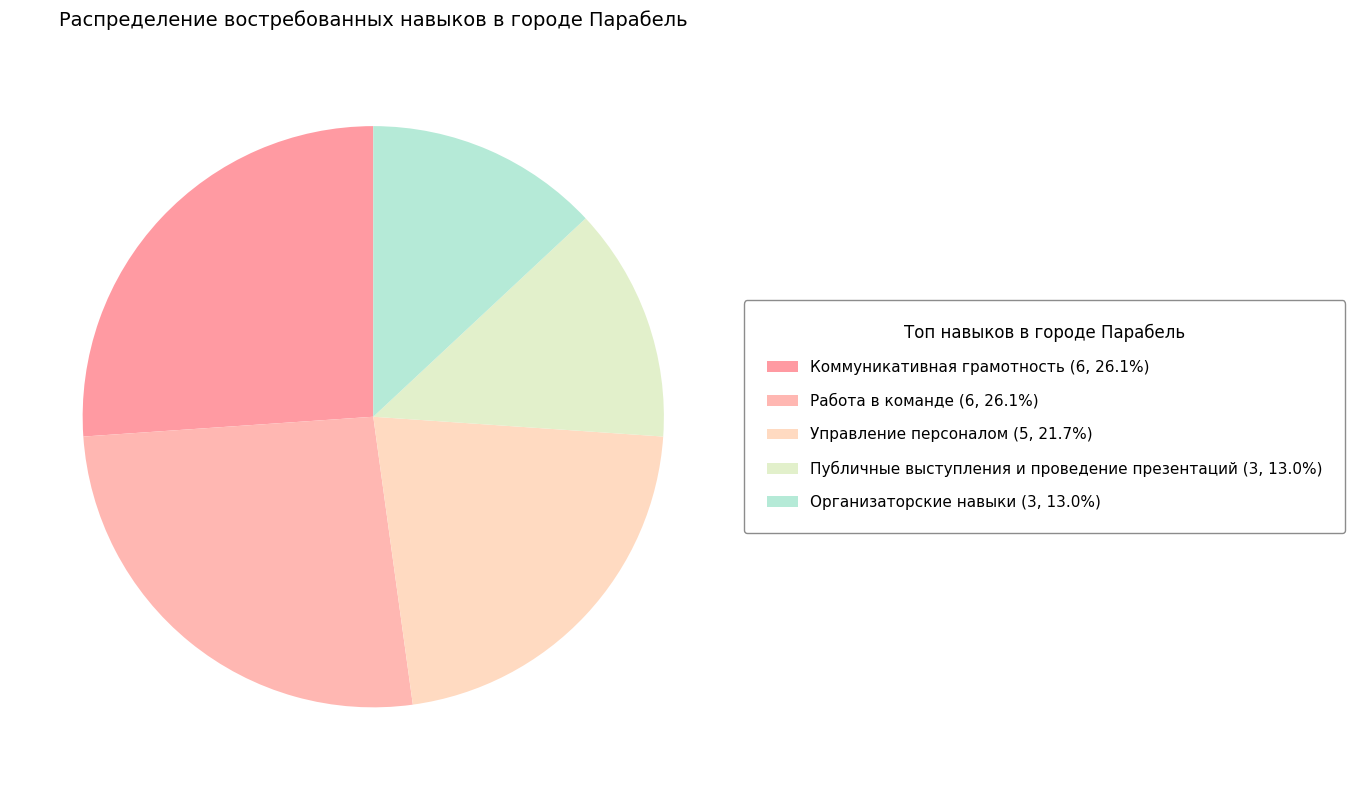

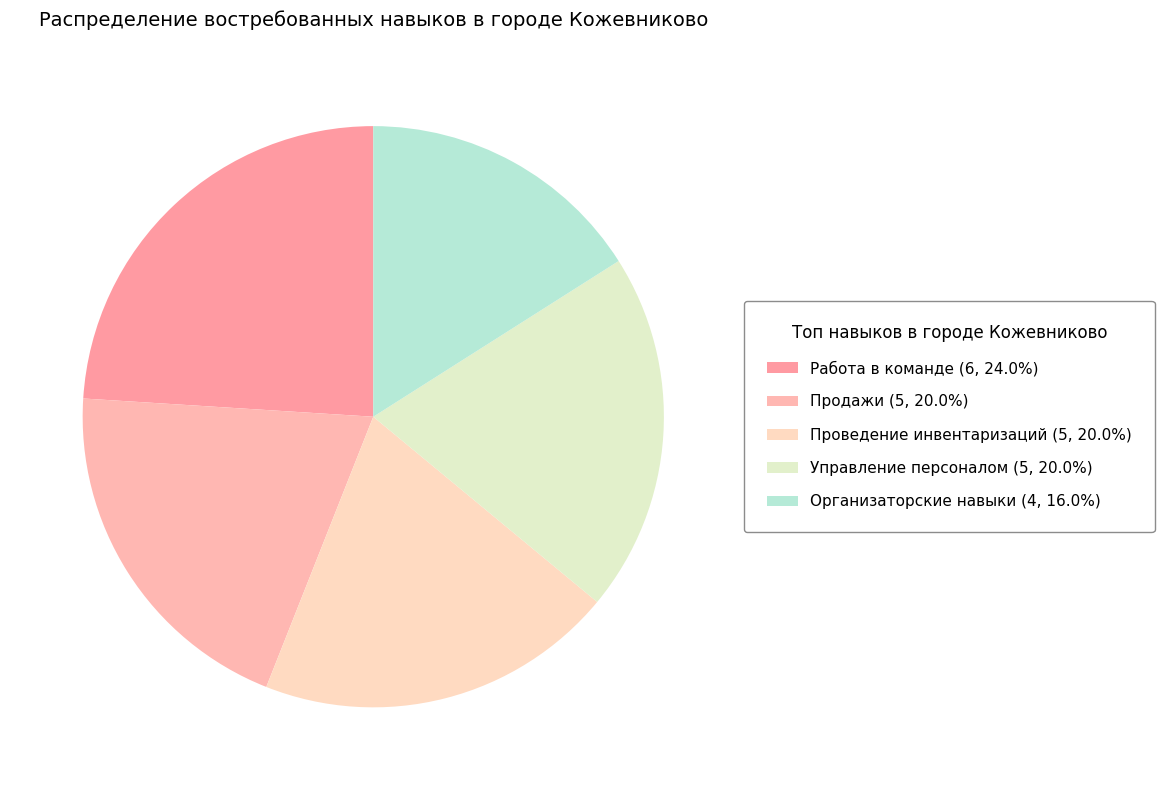

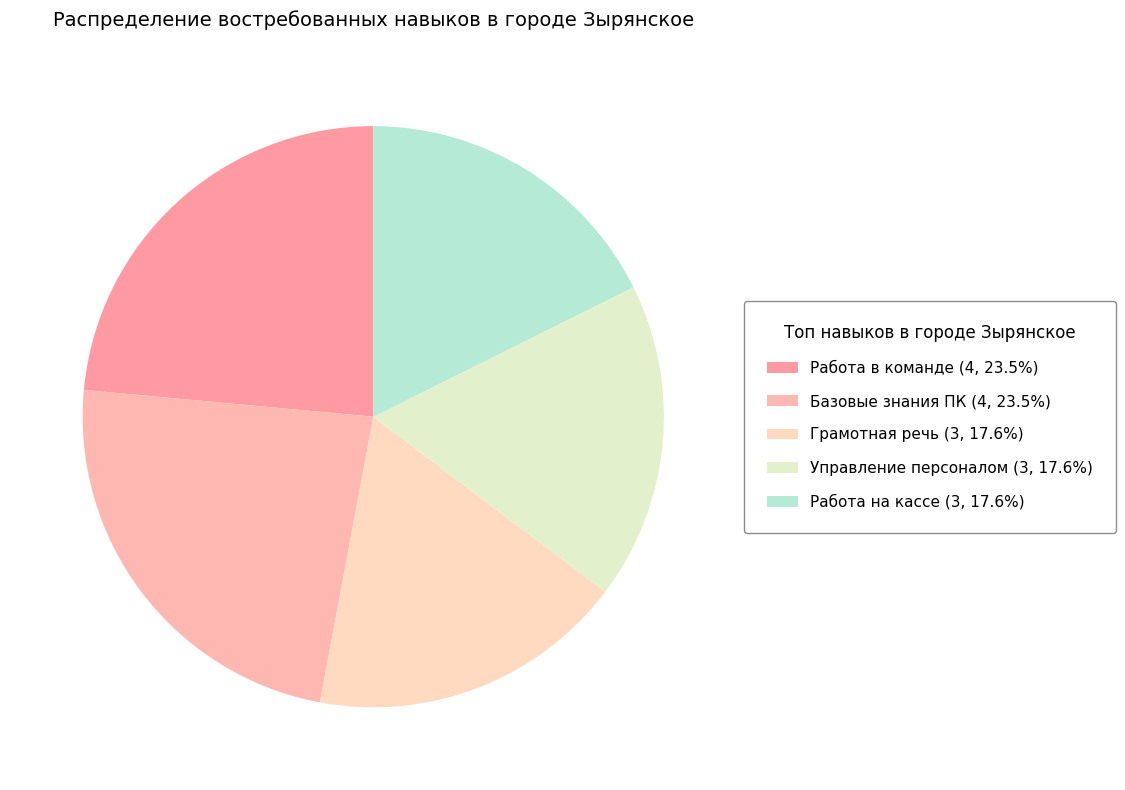

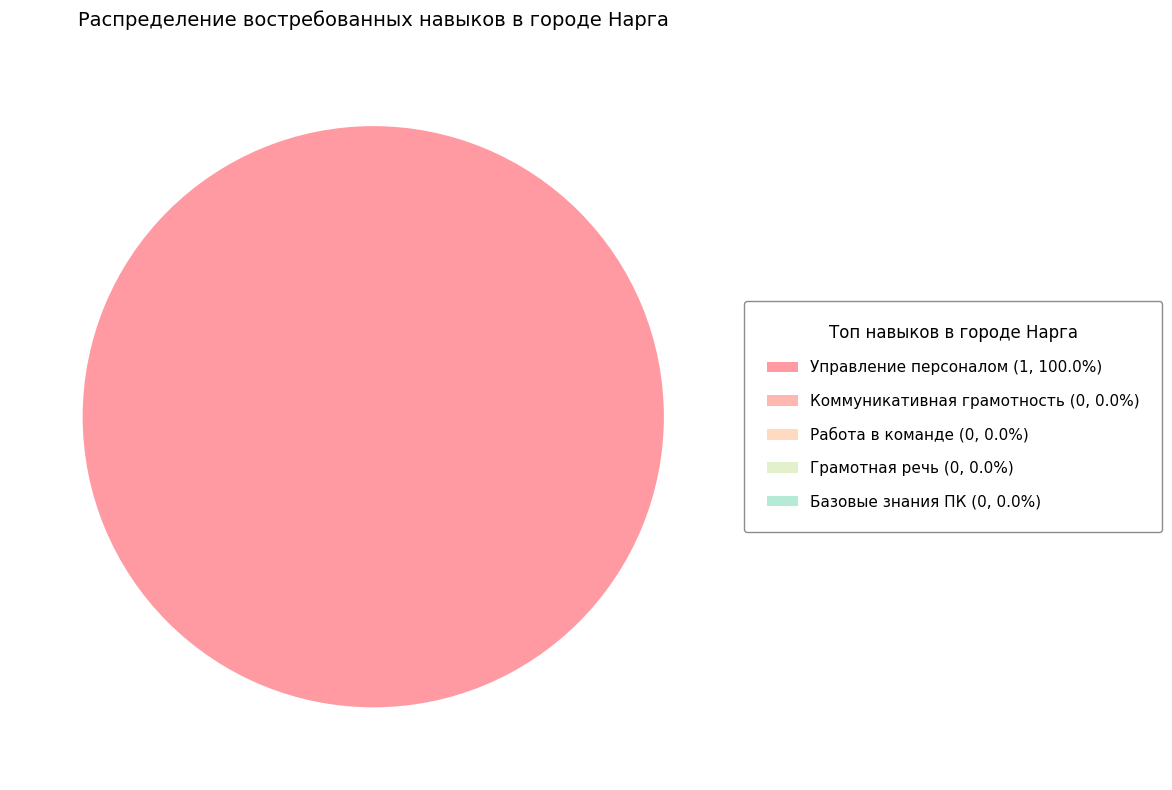

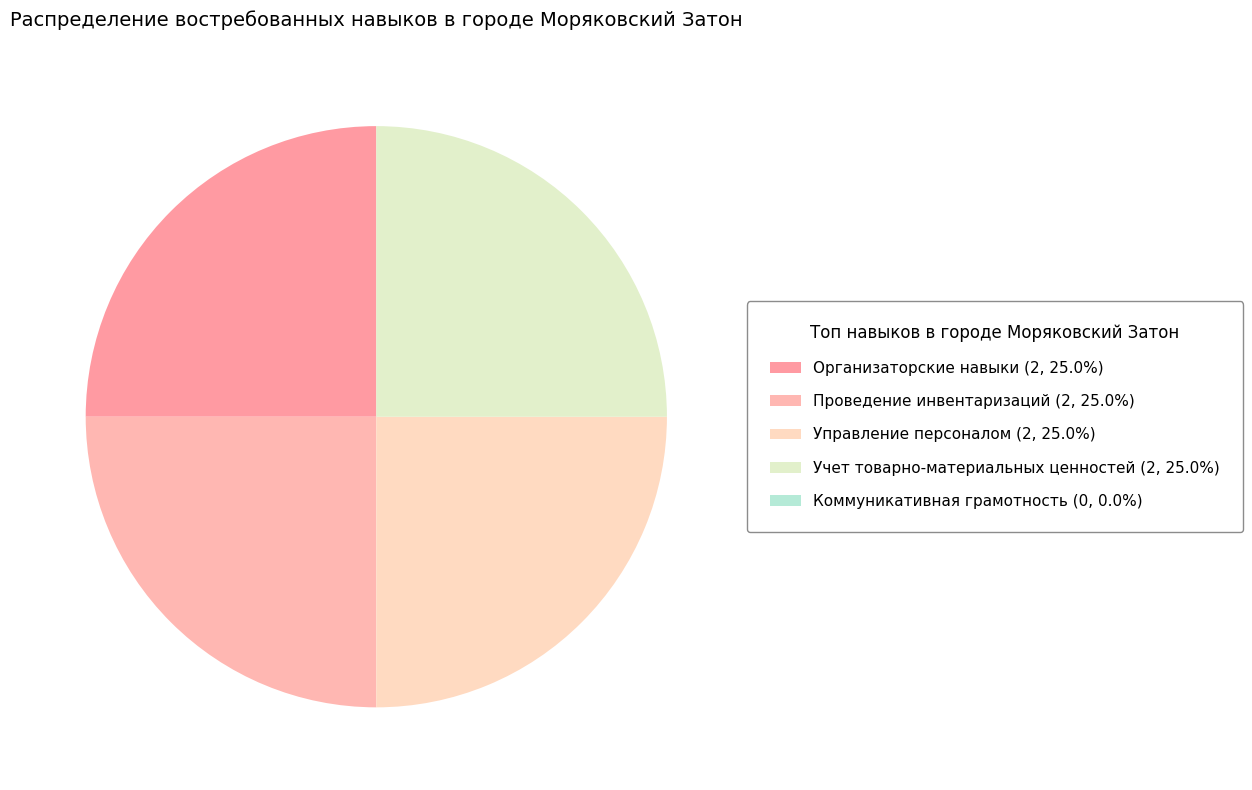

In [331]:
for city in in_demand_skills_in_cities.columns:
    # Создаем фигуру с настроенным соотношением сторон
    fig, ax = plt.subplots(figsize=(16, 8), facecolor='white')
    fig.subplots_adjust(right=0.65)  # Оставляем место для легенды

    # Получаем топ значений и рассчитываем проценты
    top_values = in_demand_skills_in_cities[city].sort_values(ascending=False).head(5)
    total = top_values.sum()
    percentages = [f'{(v/total)*100:.1f}%' for v in top_values]

    # Создаем диаграмму
    wedges, texts = plt.pie(
                            top_values, startangle=90,
                            autopct=None, colors=colors,
                            textprops=textprops
                            )

    # Формируем подписи для легенды
    legend_labels = (f'{label} ({count}, {percent})'
                    for label, count, percent in
                    zip(top_values.index, top_values.values, percentages))

    # Создаем легенду с цветными квадратами
    legend_elements = tuple((plt.Rectangle((0,0), 1, 1, fc=colors[i]) for i in range(len(top_values))))

    # Добавляем легенду с улучшенным форматированием
    legend = ax.legend(legend_elements, legend_labels,
                       title=f"Топ навыков в городе {city}",
                       loc='center left', bbox_to_anchor=(1, 0.5),
                       fontsize=11, title_fontsize=12,
                       framealpha=0.9, edgecolor='gray',
                       borderpad=1.5, labelspacing=1.2
                       )

    # Настраиваем заголовок
    plt.title(f'Распределение востребованных навыков в городе {city}',
             fontsize=14, pad=20)

    plt.tight_layout()
    plt.show()

Ключевые навыки в сфере "Торговля и продажи":

  * Всего в сфере "Торговля и продажи" выявлено 220 уникальных навыков, что свидетельствует о разнообразии требований к специалистам.


  * Продажи — лидирует в большинстве городов, включая Томск (28.9%), Северск (31.0%), Стрежевой (27.8%), Асино (28.6%), Каргасок (29.2%), и другие. Это ключевой навык для розничной торговли и сферы услуг.

  * Работа в команде — высокий спрос в Томске (19.1%), Северске (26.3%), Стрежевом (28.9%), Каргасоке (29.2%), Кожевниково (24.0%) и других. Важен для командных профессий.

  * Коммуникативная грамотность — востребована в Томске (23.3%), Колпашево (28.6%), Кедровом (25.0%), Северске (14.7%), Асино (21.4%). Критична для взаимодействия с клиентами и коллегами.

  * Базовые знания ПК — популярны в Томске (12.1%), Северске (14.1%), Зырянском (23.5%), Подгорном (20.0%). Необходимы для офисных и технических должностей.

  * Управление персоналом — выделяется в Самусье (33.3%), Колпашево (21.4%), Кривошеино (30.8%), Кожевниково (20.0%). Важно для руководящих ролей.
  
  Эти навыки составляют основу профессиональной деятельности в данной сфере.


#### 16.1.2 Есть ли взаимосвязь между навыками и требованиями к соискателям

Сгруппируем датасет по опыту и сферам деятельности

In [332]:
grouped = dataset.groupby([columns[3], columns[1]], observed=False)[columns[0]]

Выберем и сохраним результаты по необходимой нам сфере

In [333]:
in_demand_skills_based_on_experience = pd.DataFrame()

for experience in dataset[columns[3]].unique():

    try:
        group = grouped.get_group((experience, field))
        skills_counts = group.value_counts()
        in_demand_skills_based_on_experience[experience] = skills_counts

    except KeyError:
        continue

in_demand_skills_based_on_experience.fillna(0, inplace=True)
in_demand_skills_based_on_experience

,1-3,0,3-6,6-
key_skills,,,,
Продажи,973,766,141,23
Коммуникативная грамотность,788,583,104,14
Работа в команде,554,715,23,8
Грамотная речь,427,599,28,9
Поиск и привлечение новых клиентов,367,137,50,8
...,...,...,...,...
Технический перевод,1,0,0,0
Pascal/Delphi,1,0,0,0
GameDev,1,0,0,0


Визуализируем графически результаты группировки

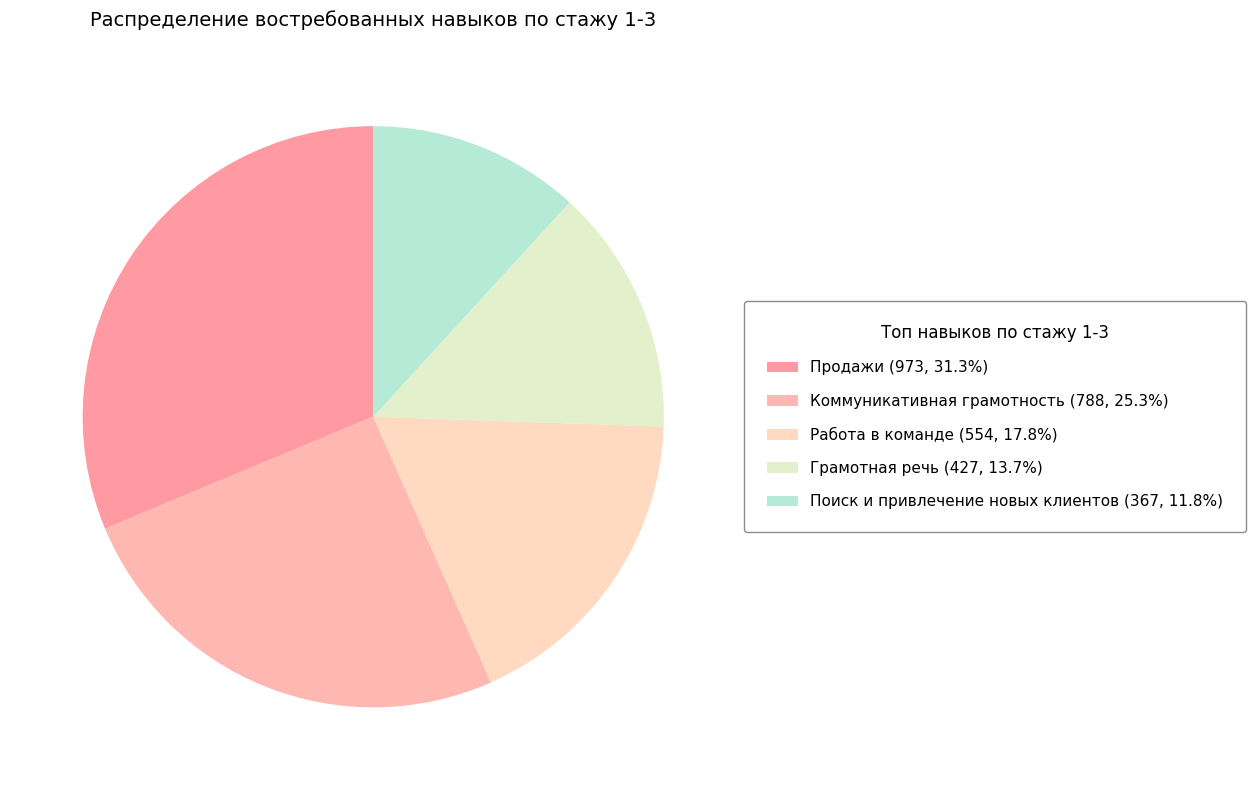

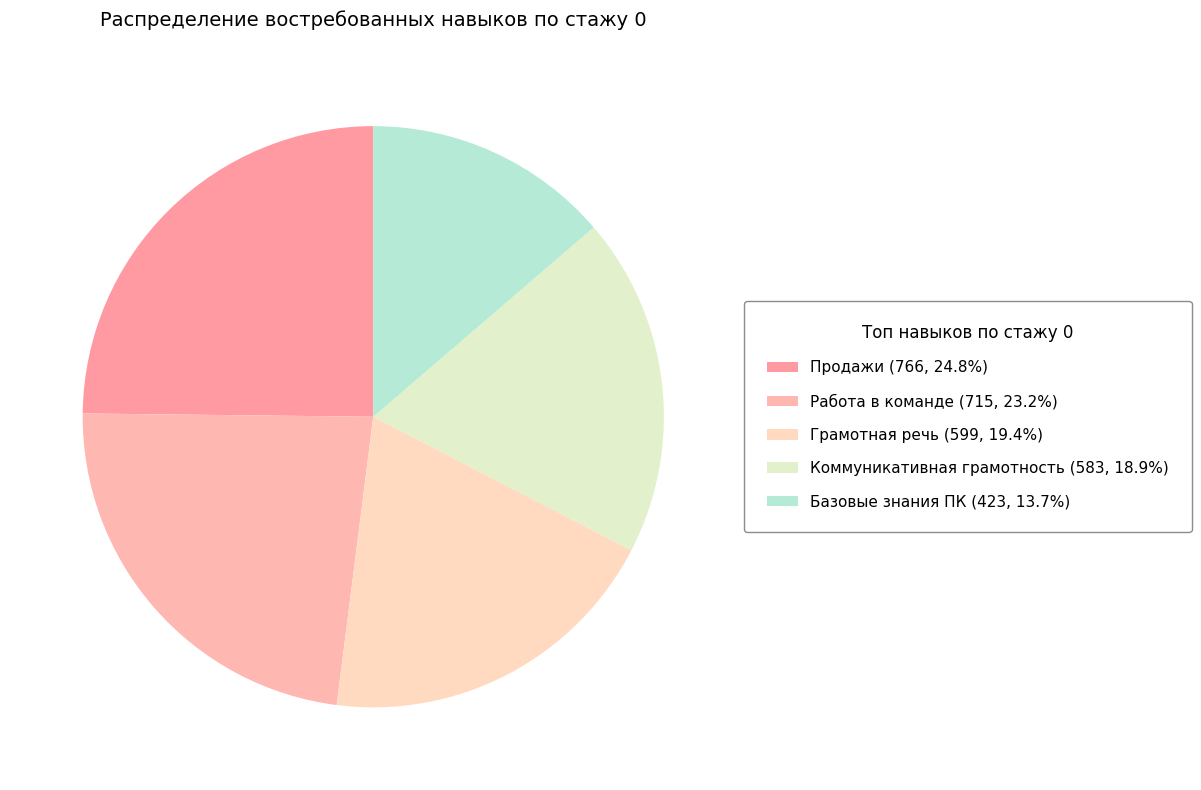

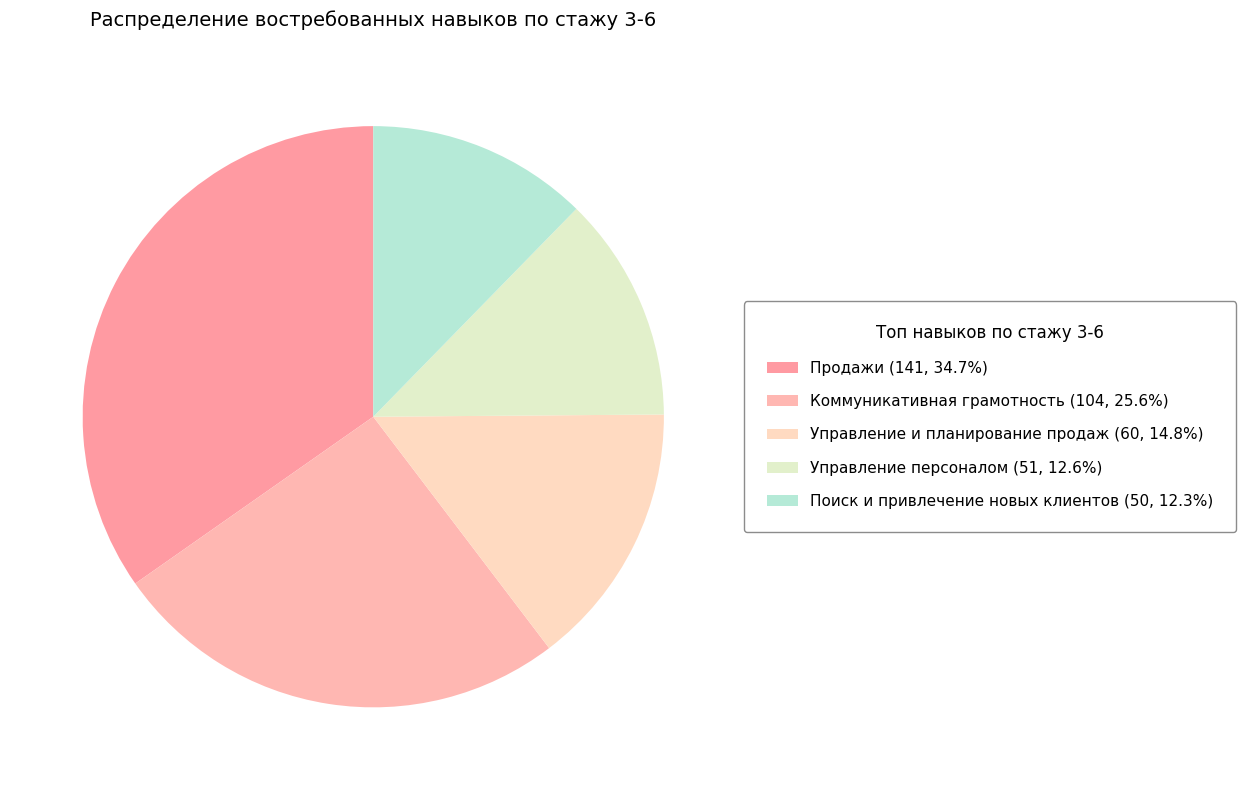

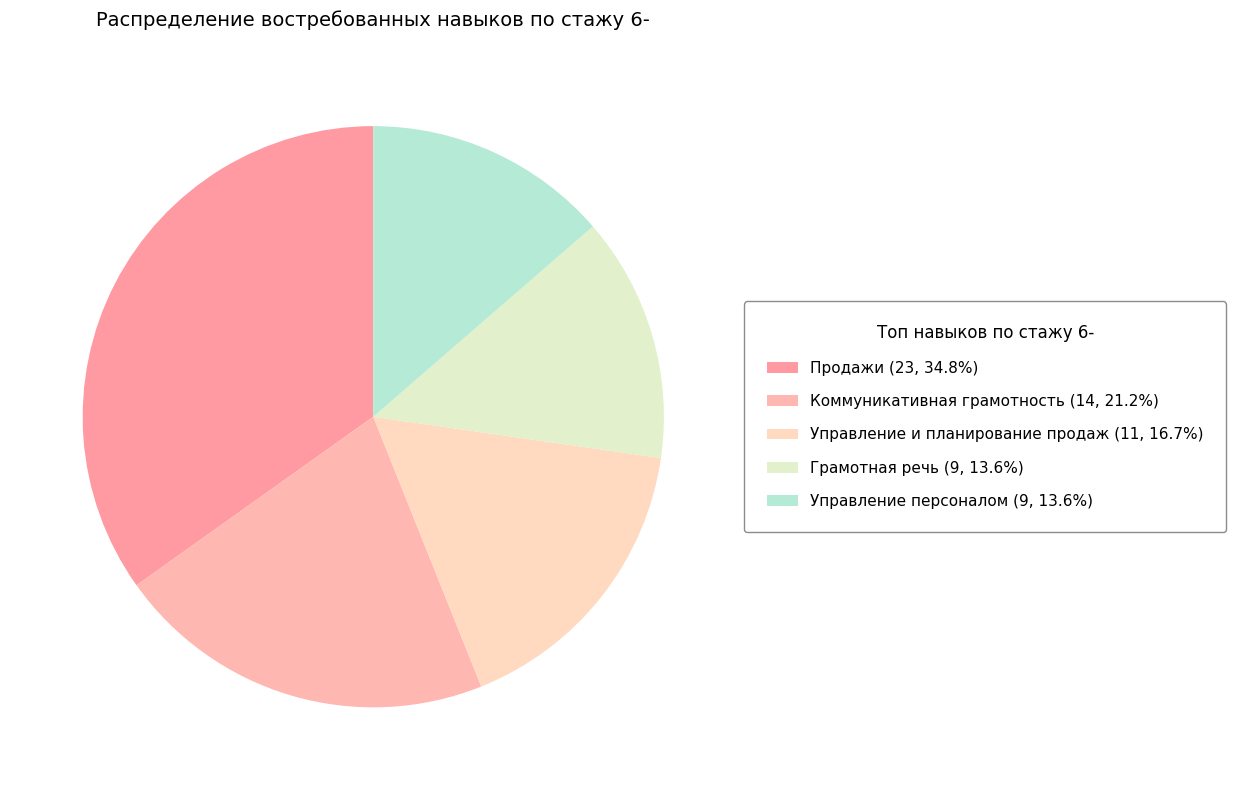

In [334]:
for experience in in_demand_skills_based_on_experience.columns:
    # Создаем фигуру с настроенным соотношением сторон
    fig, ax = plt.subplots(figsize=(16, 8), facecolor='white')
    fig.subplots_adjust(right=0.65)  # Оставляем место для легенды

    # Получаем топ значений и рассчитываем проценты
    top_values = in_demand_skills_based_on_experience[experience].sort_values(ascending=False).head(5)
    total = top_values.sum()
    percentages = [f'{(v/total)*100:.1f}%' for v in top_values]

    # Создаем диаграмму
    wedges, texts = plt.pie(
                            top_values, startangle=90,
                            autopct=None, colors=colors,
                            textprops=textprops
                            )

    # Формируем подписи для легенды
    legend_labels = (f'{label} ({count}, {percent})'
                    for label, count, percent in
                    zip(top_values.index, top_values.values, percentages))

    # Создаем легенду с цветными квадратами
    legend_elements = tuple((plt.Rectangle((0,0), 1, 1, fc=colors[i]) for i in range(len(top_values))))

    # Добавляем легенду с улучшенным форматированием
    legend = ax.legend(legend_elements, legend_labels,
                       title=f"Топ навыков по стажу {experience}",
                       loc='center left', bbox_to_anchor=(1, 0.5),
                       fontsize=11, title_fontsize=12,
                       framealpha=0.9, edgecolor='gray',
                       borderpad=1.5, labelspacing=1.2
                       )

    # Настраиваем заголовок
    plt.title(f'Распределение востребованных навыков по стажу {experience}',
             fontsize=14, pad=20)

    plt.tight_layout()
    plt.show()

Вывод о взаимосвязи навыков и требований к соискателям в зависимости от стажа:

  * Чем больше стаж, тем выше требования к управленческим и стратегическим навыкам (планирование, управление персоналом).

  * Для новичков важнее soft skills (коммуникация, работа в команде), так как профессиональный опыт у них минимален.

  * Продажи остаются ключевым навыком на всех уровнях, но с ростом стажа они дополняются управленческими аспектами.

  * Коммуникация критична на всех этапах карьеры, но с опытом она становится частью более сложных задач (переговоры, управление командой).

#### 16.1.3 Как тот или иной навык влияет на условия труда

Сгруппируем датасет по графику работы и сферам деятельности

In [335]:
grouped = dataset.groupby([columns[4], columns[1]], observed=False)[columns[0]]

Выберем и сохраним результаты по необходимой нам сфере

In [336]:
in_demand_skills_based_on_schedule = pd.DataFrame()

for schedule in dataset[columns[4]].unique():

    try:
        group = grouped.get_group((schedule, field))
        skills_counts = group.value_counts()
        in_demand_skills_based_on_schedule[schedule] = skills_counts

    except KeyError:
        continue

in_demand_skills_based_on_schedule.fillna(0, inplace=True)
in_demand_skills_based_on_schedule

,full_day,shift,remote,labor,flexible
key_skills,,,,,
Продажи,1423,321,75,3,81
Коммуникативная грамотность,1190,157,88,2,52
Работа в команде,812,365,26,4,93
Грамотная речь,691,240,52,1,79
Базовые знания ПК,518,221,31,1,39
...,...,...,...,...,...
Продажа банковских продуктов и услуг,1,0,0,0,0
Навыки работы с каналами сбыта продукции,1,0,0,0,0
Технический перевод,1,0,0,0,0


Визуализируем графически результаты группировки

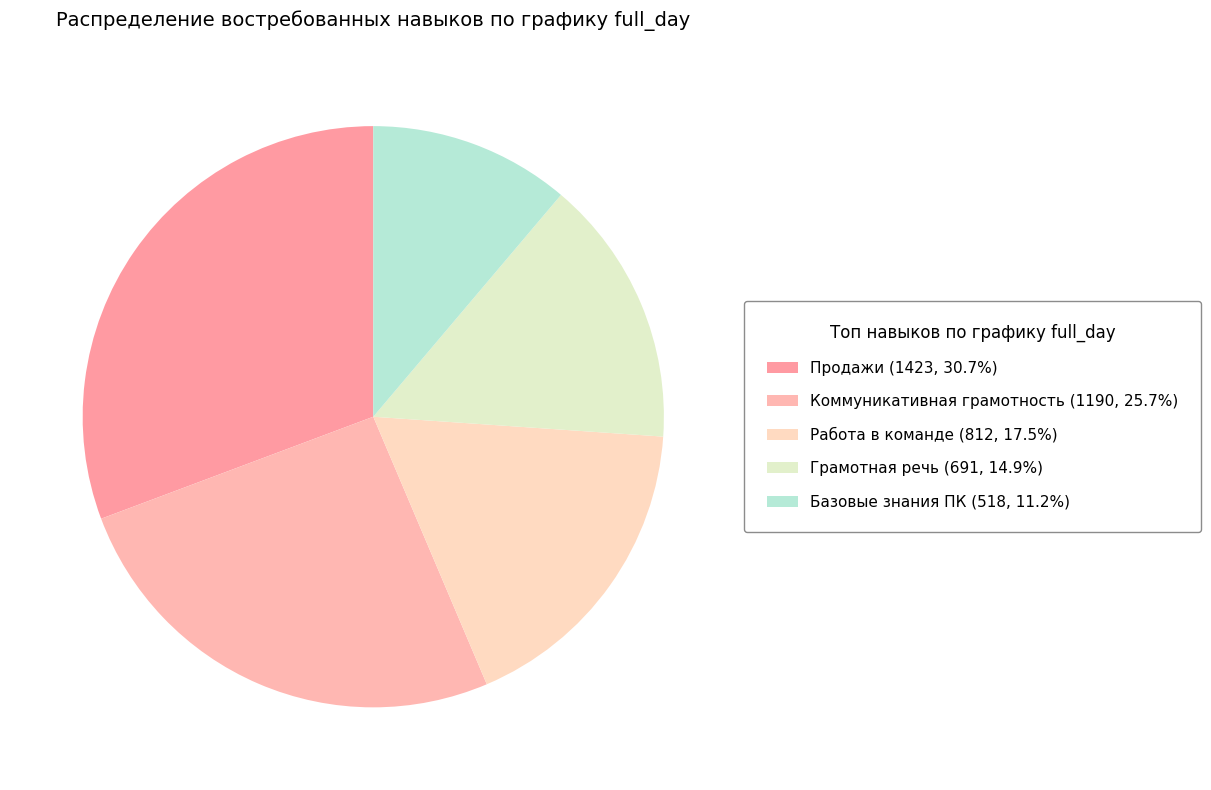

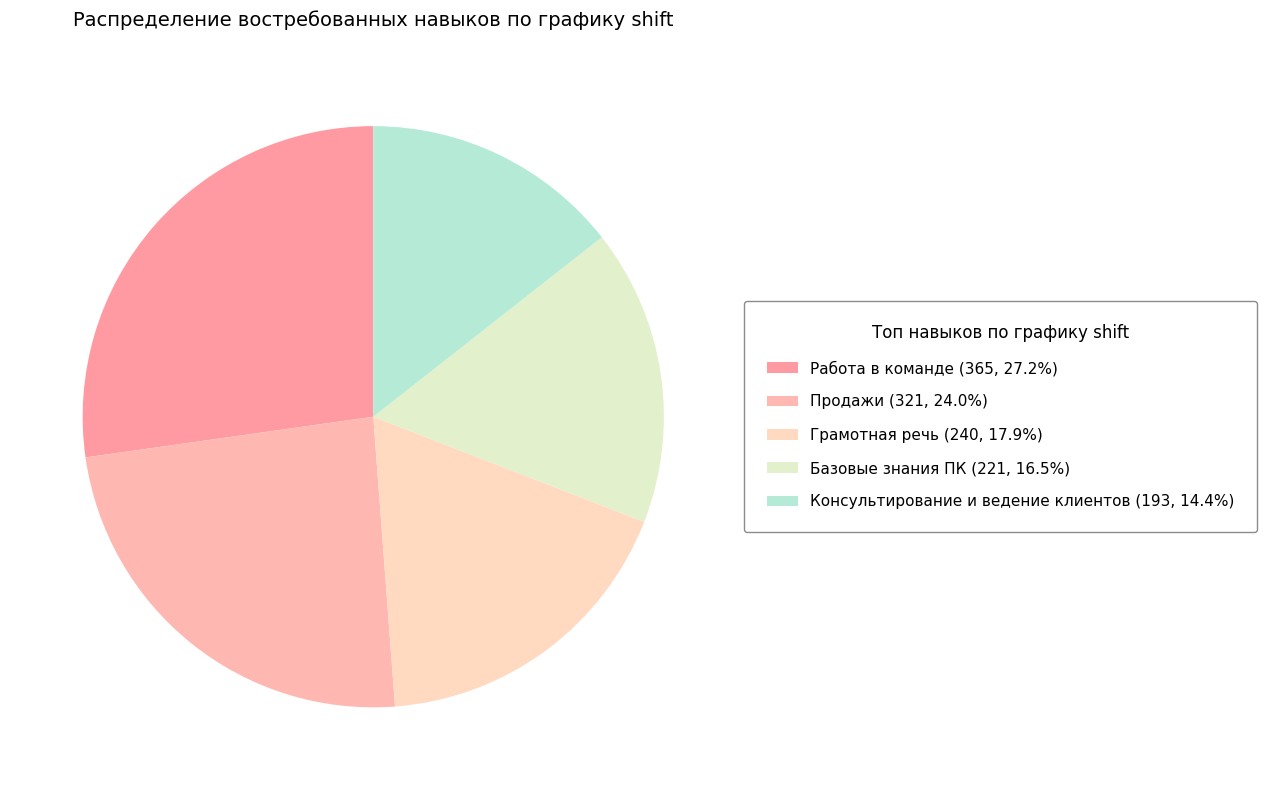

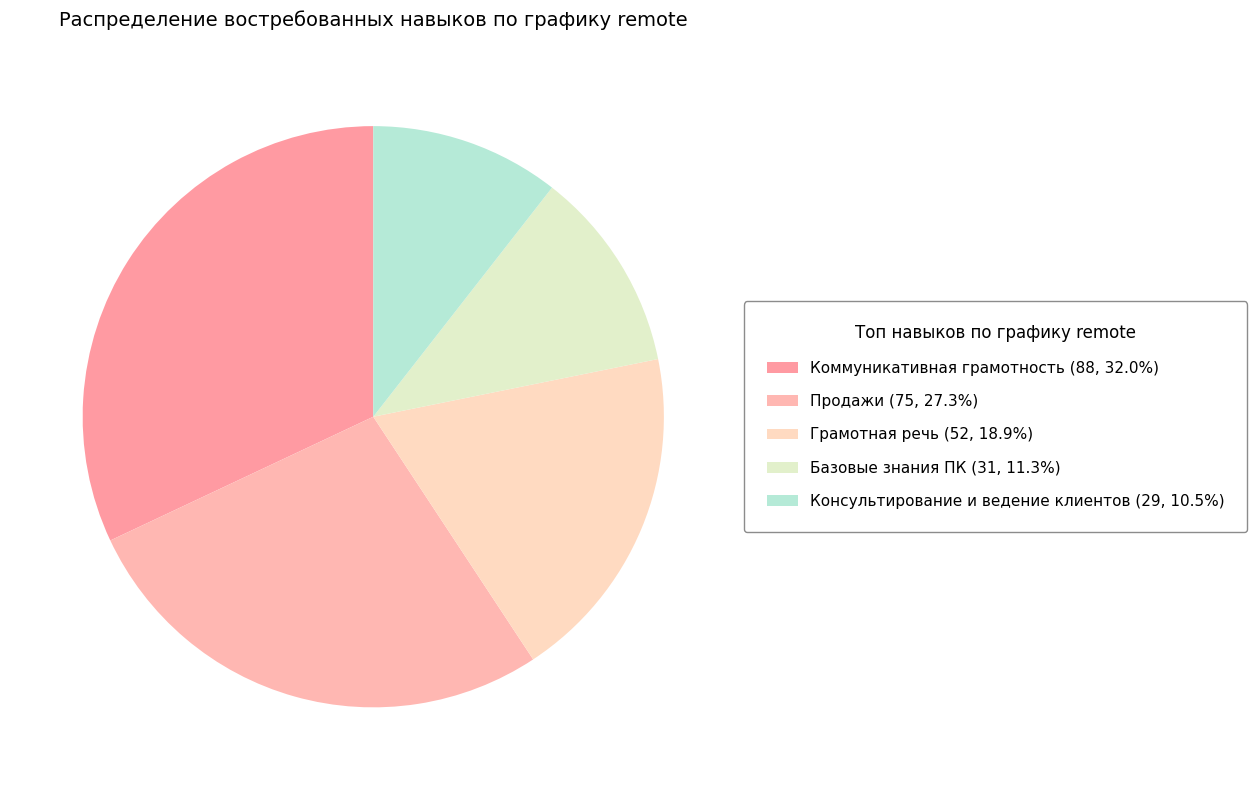

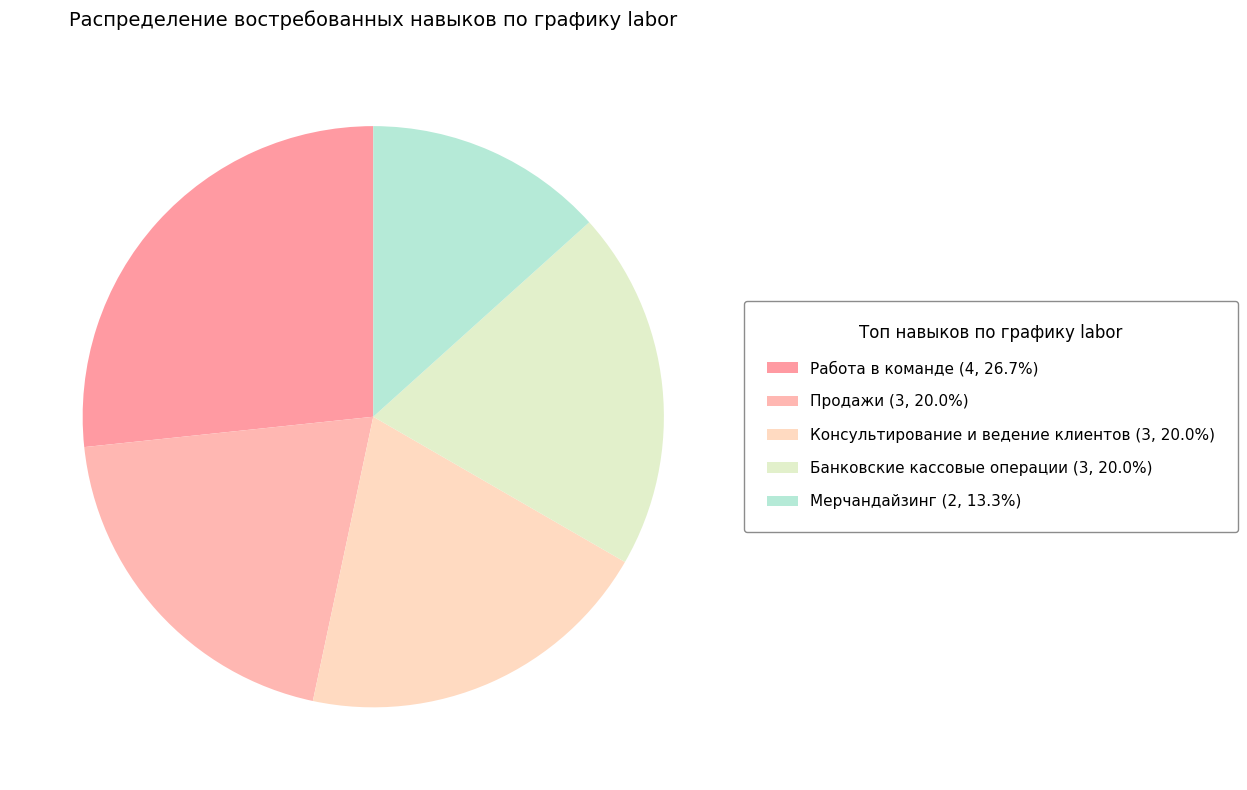

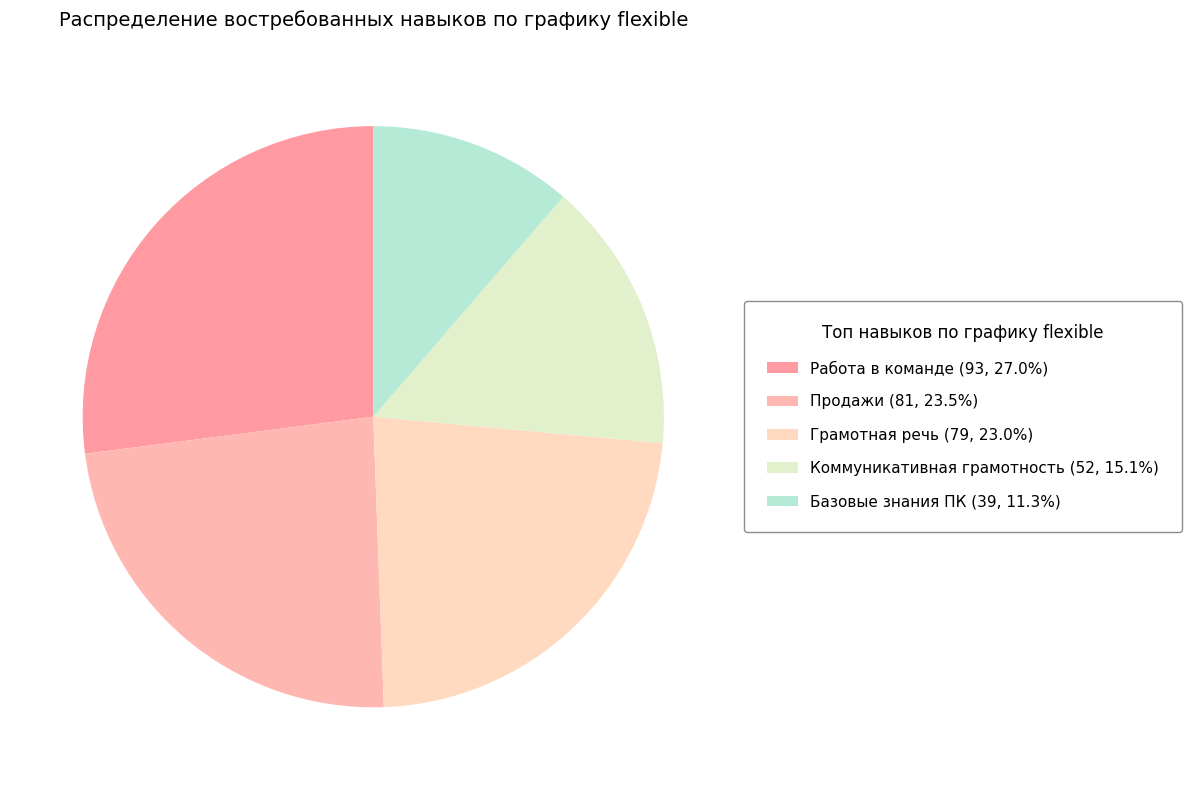

In [337]:
for schedule in in_demand_skills_based_on_schedule.columns:
    # Создаем фигуру с настроенным соотношением сторон
    fig, ax = plt.subplots(figsize=(16, 8), facecolor='white')
    fig.subplots_adjust(right=0.65)  # Оставляем место для легенды

    # Получаем топ значений и рассчитываем проценты
    top_values = in_demand_skills_based_on_schedule[schedule].sort_values(ascending=False).head(5)
    total = top_values.sum()
    percentages = [f'{(v/total)*100:.1f}%' for v in top_values]

    # Создаем диаграмму
    wedges, texts = plt.pie(
                            top_values, startangle=90,
                            autopct=None, colors=colors,
                            textprops=textprops
                            )

    # Формируем подписи для легенды
    legend_labels = (f'{label} ({count}, {percent})'
                    for label, count, percent in
                    zip(top_values.index, top_values.values, percentages))

    # Создаем легенду с цветными квадратами
    legend_elements = tuple((plt.Rectangle((0,0), 1, 1, fc=colors[i]) for i in range(len(top_values))))

    # Добавляем легенду с улучшенным форматированием
    legend = ax.legend(legend_elements, legend_labels,
                       title=f"Топ навыков по графику {schedule}",
                       loc='center left', bbox_to_anchor=(1, 0.5),
                       fontsize=11, title_fontsize=12,
                       framealpha=0.9, edgecolor='gray',
                       borderpad=1.5, labelspacing=1.2
                       )

    # Настраиваем заголовок
    plt.title(f'Распределение востребованных навыков по графику {schedule}',
             fontsize=14, pad=20)

    plt.tight_layout()
    plt.show()

Сгруппируем датасет по типу занятости и сферам деятельность

In [338]:
grouped = dataset.groupby([columns[5], columns[1]], observed=False)[columns[0]]

Выберем и сохраним результаты по необходимой нам сфере

In [339]:
in_demand_skills_based_on_employment = pd.DataFrame()

for employment in dataset[columns[5]].unique():

    try:
        group = grouped.get_group((employment, field))
        skills_counts = group.value_counts()
        in_demand_skills_based_on_employment[employment] = skills_counts

    except KeyError:
        continue

in_demand_skills_based_on_employment.fillna(0, inplace=True)
in_demand_skills_based_on_employment

,full,part,project,probation
key_skills,,,,
Продажи,1829,67,3,4
Коммуникативная грамотность,1418,67,1,3
Работа в команде,1220,72,5,3
Грамотная речь,980,78,2,3
Базовые знания ПК,754,54,1,1
...,...,...,...,...
Научно-исследовательская работа,1,0,0,0
Техническая поддержка пользователей,1,0,0,0
GameDev,1,0,0,0


Визуализируем графически результаты группировки

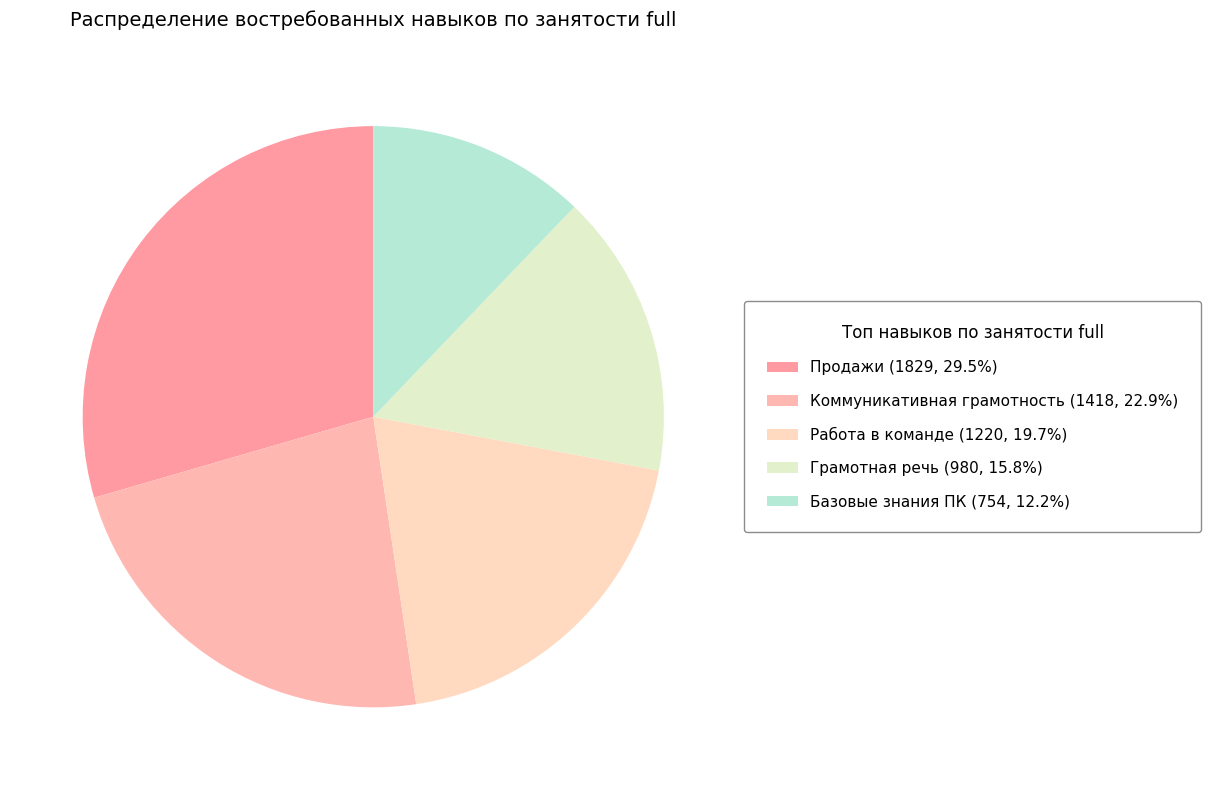

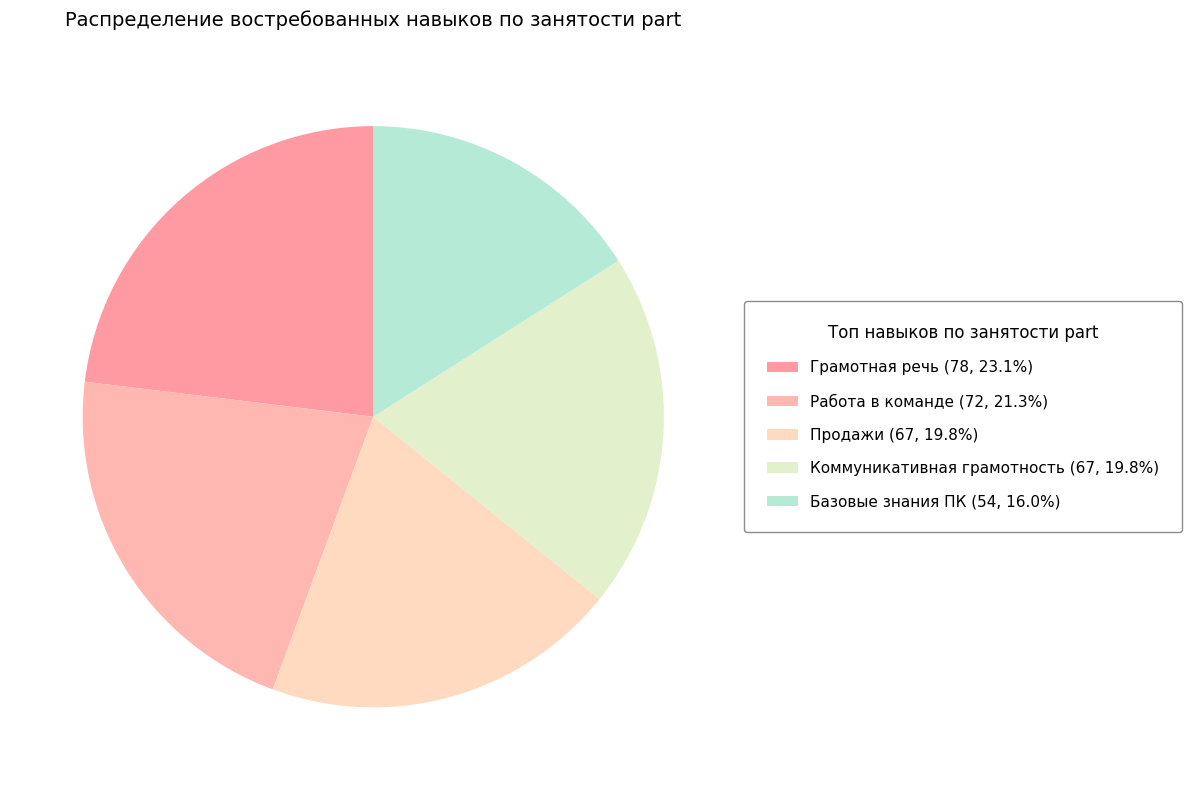

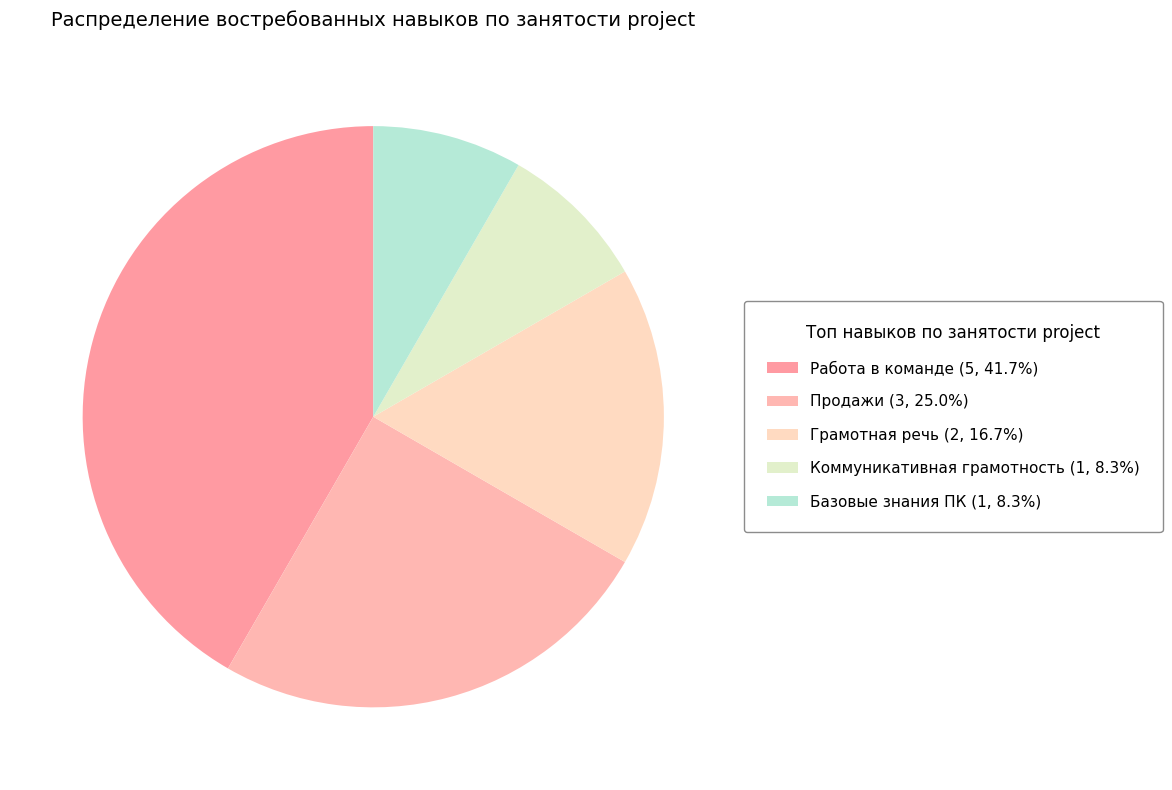

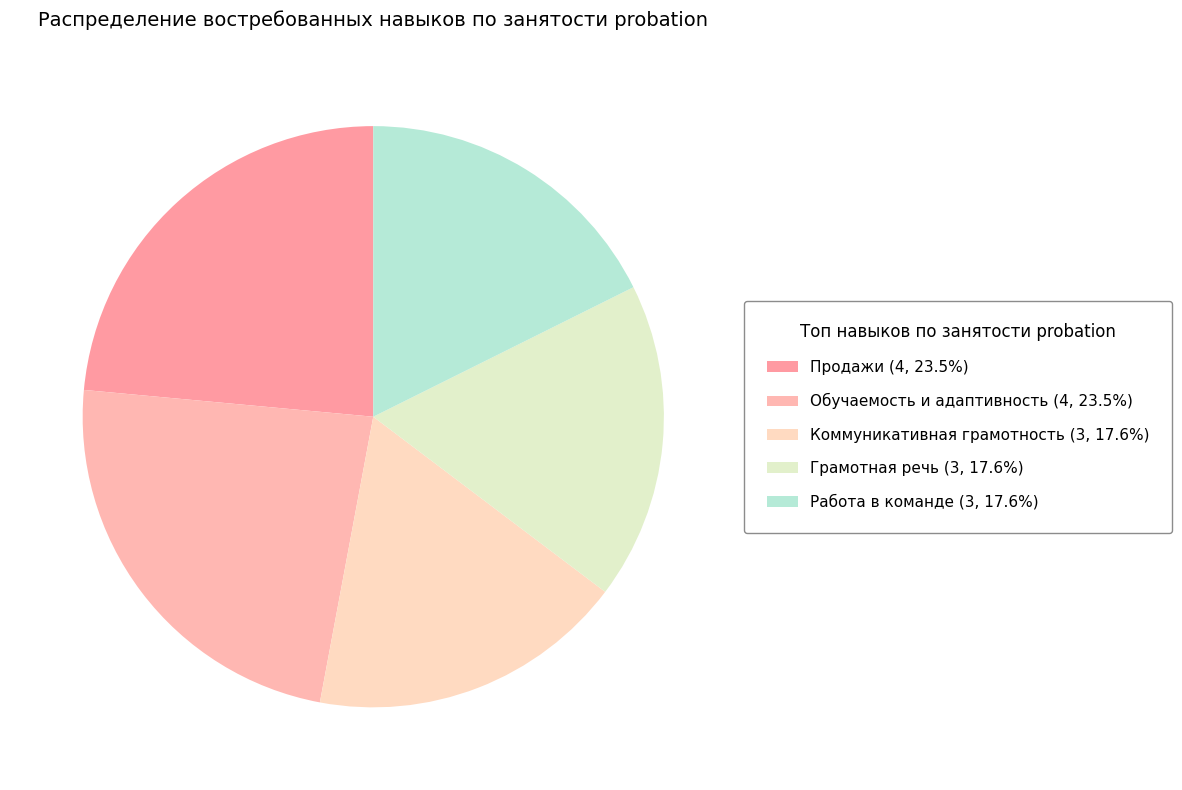

In [340]:
for employment in in_demand_skills_based_on_employment.columns:
    # Создаем фигуру с настроенным соотношением сторон
    fig, ax = plt.subplots(figsize=(16, 8), facecolor='white')
    fig.subplots_adjust(right=0.65)  # Оставляем место для легенды

    # Получаем топ значений и рассчитываем проценты
    top_values = in_demand_skills_based_on_employment[employment].sort_values(ascending=False).head(5)
    total = top_values.sum()
    percentages = [f'{(v/total)*100:.1f}%' for v in top_values]

    # Создаем диаграмму
    wedges, texts = plt.pie(
                            top_values, startangle=90,
                            autopct=None, colors=colors,
                            textprops=textprops
                            )

    # Формируем подписи для легенды
    legend_labels = (f'{label} ({count}, {percent})'
                    for label, count, percent in
                    zip(top_values.index, top_values.values, percentages))

    # Создаем легенду с цветными квадратами
    legend_elements = tuple((plt.Rectangle((0,0), 1, 1, fc=colors[i]) for i in range(len(top_values))))

    # Добавляем легенду с улучшенным форматированием
    legend = ax.legend(legend_elements, legend_labels,
                       title=f"Топ навыков по занятости {employment}",
                       loc='center left', bbox_to_anchor=(1, 0.5),
                       fontsize=11, title_fontsize=12,
                       framealpha=0.9, edgecolor='gray',
                       borderpad=1.5, labelspacing=1.2
                       )

    # Настраиваем заголовок
    plt.title(f'Распределение востребованных навыков по занятости {employment}',
             fontsize=14, pad=20)

    plt.tight_layout()
    plt.show()

Сгруппируем датасет по доступности вакансий для соискателей с инвалидностью и сфере деятельности

In [341]:
grouped = dataset.groupby([columns[6], columns[1]], observed=False)[columns[0]]

Выберем и сохраним результаты по необходимой нам сфере

In [342]:
in_demand_skills_based_on_accept_handicapped = pd.DataFrame()

for accept_handicapped in dataset[columns[6]].unique():

    try:
        group = grouped.get_group((accept_handicapped, field))
        skills_counts = group.value_counts()
        in_demand_skills_based_on_accept_handicapped[accept_handicapped] = skills_counts

    except KeyError:
        continue

in_demand_skills_based_on_accept_handicapped.fillna(0, inplace=True)
in_demand_skills_based_on_accept_handicapped

,0,1
key_skills,,
Продажи,1876,27
Коммуникативная грамотность,1462,27
Работа в команде,1287,13
Грамотная речь,1043,20
Базовые знания ПК,794,16
...,...,...
Научно-исследовательская работа,1,0
Техническая поддержка пользователей,1,0
GameDev,1,0


Визуализируем графически результаты группировки

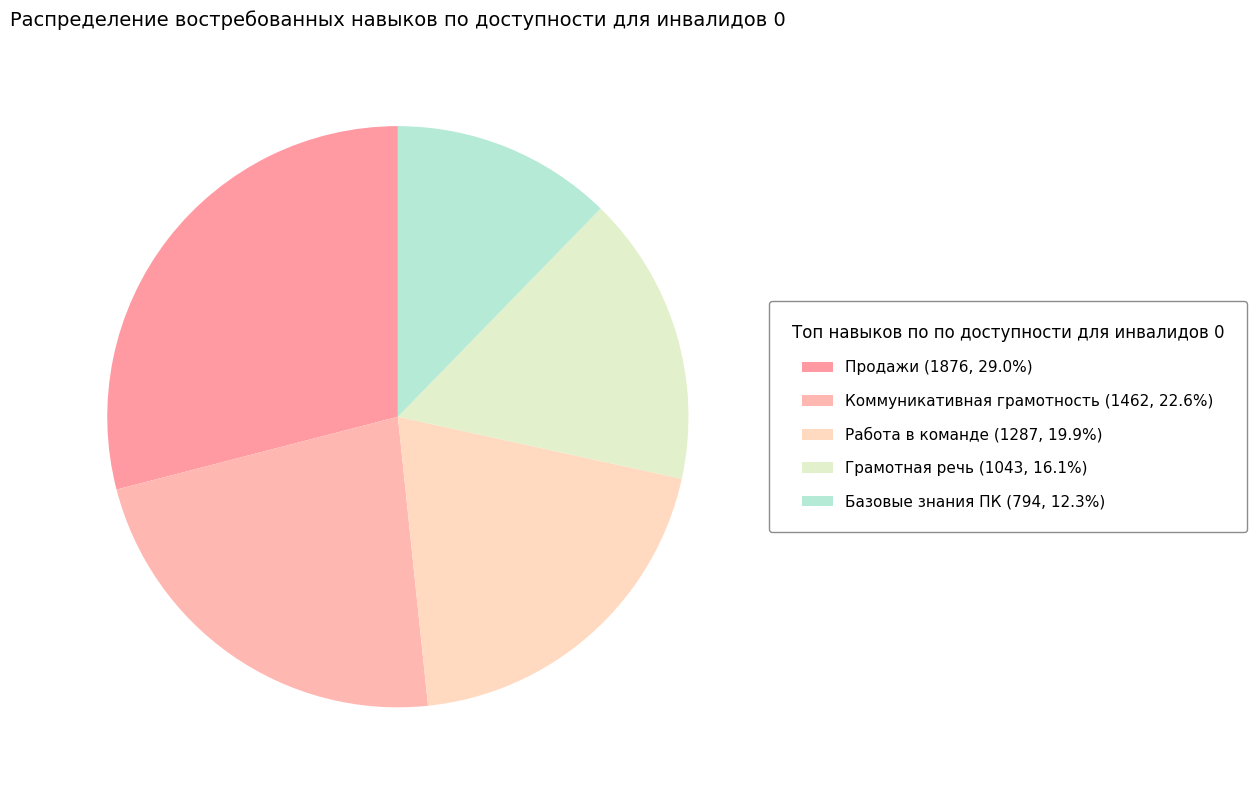

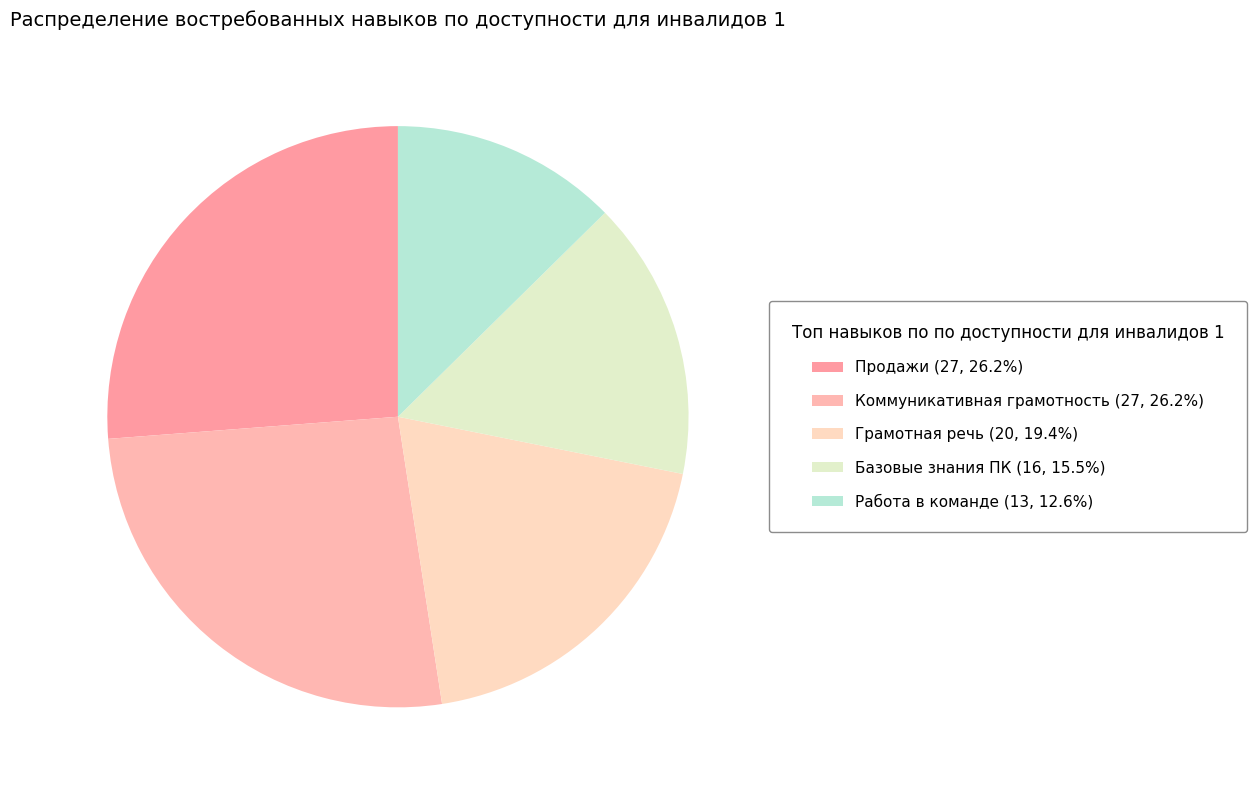

In [343]:
for accept_handicapped in in_demand_skills_based_on_accept_handicapped.columns:
    # Создаем фигуру с настроенным соотношением сторон
    fig, ax = plt.subplots(figsize=(16, 8), facecolor='white')
    fig.subplots_adjust(right=0.65)  # Оставляем место для легенды

    # Получаем топ значений и рассчитываем проценты
    top_values = in_demand_skills_based_on_accept_handicapped[accept_handicapped].sort_values(ascending=False).head(5)
    total = top_values.sum()
    percentages = [f'{(v/total)*100:.1f}%' for v in top_values]

    # Создаем диаграмму
    wedges, texts = plt.pie(
                            top_values, startangle=90,
                            autopct=None, colors=colors,
                            textprops=textprops
                            )

    # Формируем подписи для легенды
    legend_labels = (f'{label} ({count}, {percent})'
                    for label, count, percent in
                    zip(top_values.index, top_values.values, percentages))

    # Создаем легенду с цветными квадратами
    legend_elements = tuple((plt.Rectangle((0,0), 1, 1, fc=colors[i]) for i in range(len(top_values))))

    # Добавляем легенду с улучшенным форматированием
    legend = ax.legend(legend_elements, legend_labels,
                       title=f"Топ навыков по по доступности для инвалидов {accept_handicapped}",
                       loc='center left', bbox_to_anchor=(1, 0.5),
                       fontsize=11, title_fontsize=12,
                       framealpha=0.9, edgecolor='gray',
                       borderpad=1.5, labelspacing=1.2
                       )

    # Настраиваем заголовок
    plt.title(f'Распределение востребованных навыков по доступности для инвалидов {accept_handicapped}',
             fontsize=14, pad=20)

    plt.tight_layout()
    plt.show()

Вывод о влиянии навыков на условия труда:

  * Влияние навыков на график работы:

    - Полный день (full_day):
  
      * Доминируют:
    
        - Продажи (30.7%)
      
        - Коммуникативная грамотность (25.7%)  

      * Требуются устойчивые навыки работы с клиентами и командой.  

    - Сменный график (shift)  
  
      * Доминируют:
    
        - Работа в команде (27.2%)
      
        -  Продажи (24.0%)

      * Акцент на слаженное взаимодействие в коллективе и оперативность.  

    - Удаленная работа (remote):  
  
      * Доминируют:
      
        - Коммуникативная грамотность (32.0%)
        
        - Продажи (27.3%)

      * Чуть меньше требований к навыкам продаж, но выше спрос к навыкам коммуникаций.  

    - Гибкий график (flexible):
  
      * Доминируют:
       
       - Работа в команде (27.0%)
       
       - Грамотная речь (23.0%)  
  
      * Упор на адаптивность и четкое выражение мыслей.  

    - Вахтовый график (labor):
    
      * Доминируют:
      
        - Работа в команде (26.7%)
        
        - Банковские кассовые операции (20.0%)  
  
      * Специфические навыки для логистики, складов, узкопрофильных задач.  

  * Влияние навыков на тип занятости:

    - Полная занятость (full):

      * Преобладают:
      
        - Продажи (29.5%)
        
        - Коммуникативная грамотность (22.9%)

      * Стандартные требования для стабильных должностей в компаниях.  

    - Частичная занятость (part)

      * Преобладают:
      
        - Грамотная речь (23.1%)
        
        - Работа в команде (21.3%)  
  
      * Подходит для подработок, совместительства, где важна краткая эффективная коммуникация.  

    - Проектная работа (project)  
  
      * Преобладает:
      
        - Работа в команде (41.7%)

      * Крайне важна координация между участниками проекта и четкие сроки.  

    - Испытательный срок (probation)  
  
      * Преобладают:
      
        - Обучаемость (23.5%)
        
        - Продажи (23.5%)  
  
      * Работодатель оценивает потенциал и быструю адаптацию.  

  * Влияние навыков на доступность для инвалидов:

    - Лидирующие позиции в обоих случаях занимают:

      * Продажи (~26-29%)

      * Коммуникативная грамотность (~23-26%)

      * Грамотная речь (~16-19%)

      * Базовые знания ПК (~12-16%)

      * Работа в команде (~13-20%)